In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from scipy import stats

np.set_printoptions(precision=4)
sns.set(font_scale=1.5)
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Loading thge data

In [3]:
df = pd.read_csv('/Users/sandra/Desktop/Projects/air_clean_data.csv')
df.head()

year  month  day  hour  PM2.5  PM10  SO2        NO2     CO    O3  TEMP  \
0  2013      3    1     0    4.0   4.0  3.0  50.638586  200.0  82.0  -2.3   
1  2013      3    1     1    7.0   7.0  3.0  50.638586  200.0  80.0  -2.5   
2  2013      3    1     2    5.0   5.0  3.0   2.000000  200.0  79.0  -3.0   
3  2013      3    1     3    6.0   6.0  3.0  50.638586  200.0  79.0  -3.6   
4  2013      3    1     4    5.0   5.0  3.0  50.638586  200.0  81.0  -3.5   

     PRES  DEWP  RAIN   wd  WSPM   station   dateInt        date  
0  1020.8 -19.7   0.0    E   0.5  Dingling  20130301  2013-03-01  
1  1021.3 -19.0   0.0  ENE   0.7  Dingling  20130301  2013-03-01  
2  1021.3 -19.9   0.0  ENE   0.2  Dingling  20130301  2013-03-01  
3  1021.8 -19.1   0.0  NNE   1.0  Dingling  20130301  2013-03-01  
4  1022.3 -19.4   0.0    N   2.1  Dingling  20130301  2013-03-01

In [4]:
#converting year,month, day, hour columns into datetime format 
#and changing index into Date required for time series analysis
df['dateInt']=df['year'].astype(str) + df['month'].astype(str).str.zfill(2)+ df['day'].astype(str).str.zfill(2)+df['hour'].astype(str).str.zfill(2)
df['Date'] = pd.to_datetime(df['dateInt'], format='%Y%m%d%H')

In [5]:
df.set_index('Date', inplace=True)
df.head()

year  month  day  hour  PM2.5  PM10  SO2        NO2  \
Date                                                                       
2013-03-01 00:00:00  2013      3    1     0    4.0   4.0  3.0  50.638586   
2013-03-01 01:00:00  2013      3    1     1    7.0   7.0  3.0  50.638586   
2013-03-01 02:00:00  2013      3    1     2    5.0   5.0  3.0   2.000000   
2013-03-01 03:00:00  2013      3    1     3    6.0   6.0  3.0  50.638586   
2013-03-01 04:00:00  2013      3    1     4    5.0   5.0  3.0  50.638586   

                        CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM  \
Date                                                                    
2013-03-01 00:00:00  200.0  82.0  -2.3  1020.8 -19.7   0.0    E   0.5   
2013-03-01 01:00:00  200.0  80.0  -2.5  1021.3 -19.0   0.0  ENE   0.7   
2013-03-01 02:00:00  200.0  79.0  -3.0  1021.3 -19.9   0.0  ENE   0.2   
2013-03-01 03:00:00  200.0  79.0  -3.6  1021.8 -19.1   0.0  NNE   1.0   
2013-03-01 04:00:00  200.0  81.0  -3.5  1022.3 -19.4   0.0    N   2.1   

                      station     dateInt        date  
Date                                                   
2013-03-01 00:00:00  Dingling  2013030100  2013-03-01  
2013-03-01 01:00:00  Dingling  2013030101  2013-03-01  
2013-03-01 02:00:00  Dingling  2013030102  2013-03-01  
2013-03-01 03:00:00  Dingling  2013030103  2013-03-01  
2013-03-01 04:00:00  Dingling  2013030104  2013-03-01

In [6]:
cols_to_drop = ['year', 'month', 'day', 'hour']
df = df.drop(cols_to_drop, axis = 1)

In [7]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
df_daily = df.resample('D').mean()
df_daily.head()

PM2.5        PM10        SO2         NO2           CO  \
Date                                                                     
2013-03-01    7.326389   12.739583   9.232639   25.871867   417.013889   
2013-03-02   31.475694   40.760417  31.660656   56.599572   947.527778   
2013-03-03   79.291667  111.104167  49.239583   76.288572  1770.274306   
2013-03-04   22.309028   40.888889  18.764872   43.629349   729.118056   
2013-03-05  127.868056  159.236111  69.993056  100.719212  2015.364583   

                   O3      TEMP         PRES       DEWP  RAIN      WSPM  
Date                                                                     
2013-03-01  67.996528  1.173958  1026.569792 -20.148611   0.0  2.917708  
2013-03-02  32.621946  0.260417  1026.552778 -16.271875   0.0  1.145139  
2013-03-03  22.788194  5.257292  1014.215278 -12.325347   0.0  1.463194  
2013-03-04  56.833333  9.610764  1017.263194 -12.773264   0.0  2.227083  
2013-03-05  79.527778  6.630556  1010.551389  -7.916319   0.0  0.992014

In [9]:
df_weekly = df_daily.resample('W').mean()
df_weekly.head()

PM2.5        PM10        SO2        NO2           CO  \
Date                                                                    
2013-03-03   39.364583   54.868056  30.044293  52.920004  1044.938657   
2013-03-10  127.499504  173.327381  54.273529  87.369242  1995.890873   
2013-03-17  155.800595  165.871528  54.148313  83.345155  1748.444940   
2013-03-24   61.516369   77.979167  16.282738  46.390180   881.646825   
2013-03-31  101.655258  129.342510  31.971502  59.117498  1215.246032   

                   O3      TEMP         PRES       DEWP      RAIN      WSPM  
Date                                                                         
2013-03-03  41.135556  2.230556  1022.445949 -16.248611  0.000000  1.842014  
2013-03-10  71.200893  7.921974  1008.608036  -7.972123  0.000000  1.878720  
2013-03-17  72.194444  6.276538  1013.946478  -3.122867  0.021280  1.480060  
2013-03-24  48.581252  4.453819  1009.503224  -6.526091  0.083978  2.288740  
2013-03-31  40.110355  6.928819  1012.459077  -5.007341  0.000000  1.917163

In [10]:
df_monthly = df_daily.resample('M').mean()
df_monthly.head()

PM2.5        PM10        SO2        NO2           CO  \
Date                                                                    
2013-03-31  104.625672  128.717686  38.285982  67.494017  1420.110215   
2013-04-30   62.086227   95.828819  20.614506  46.457355   902.883218   
2013-05-31   80.890009  129.808356  24.939006  50.576037   983.023746   
2013-06-30  101.236053  115.835012  13.625159  48.249550  1332.907755   
2013-07-31   67.378678   76.557345   7.410949  39.955142   932.193486   

                   O3       TEMP         PRES       DEWP      RAIN      WSPM  
Date                                                                          
2013-03-31  56.387590   5.992249  1012.224373  -6.682090  0.023768  1.886414  
2013-04-30  61.348644  12.380058  1007.811817  -3.203681  0.014294  2.333310  
2013-05-31  83.671420  21.676691  1002.652912   8.131384  0.005791  1.811694  
2013-06-30  74.453136  23.583426   999.639838  17.433322  0.126528  1.287350  
2013-07-31  78.636699  27.108838   995.501639  20.902231  0.275582  1.317039

### Sarima modeling

In [11]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
import pmdarima as pmd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf

In [12]:
def autocorr_plots(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    return fig, ax

## PM 2.5 - Particulate Matter 2.5

In [13]:
pm25_rate = df_weekly[['PM2.5']]
pm25_rate

PM2.5
Date                  
2013-03-03   39.364583
2013-03-10  127.499504
2013-03-17  155.800595
2013-03-24   61.516369
2013-03-31  101.655258
...                ...
2017-02-05   89.548750
2017-02-12   40.694492
2017-02-19  113.844524
2017-02-26   33.729891
2017-03-05   41.230879

[210 rows x 1 columns]

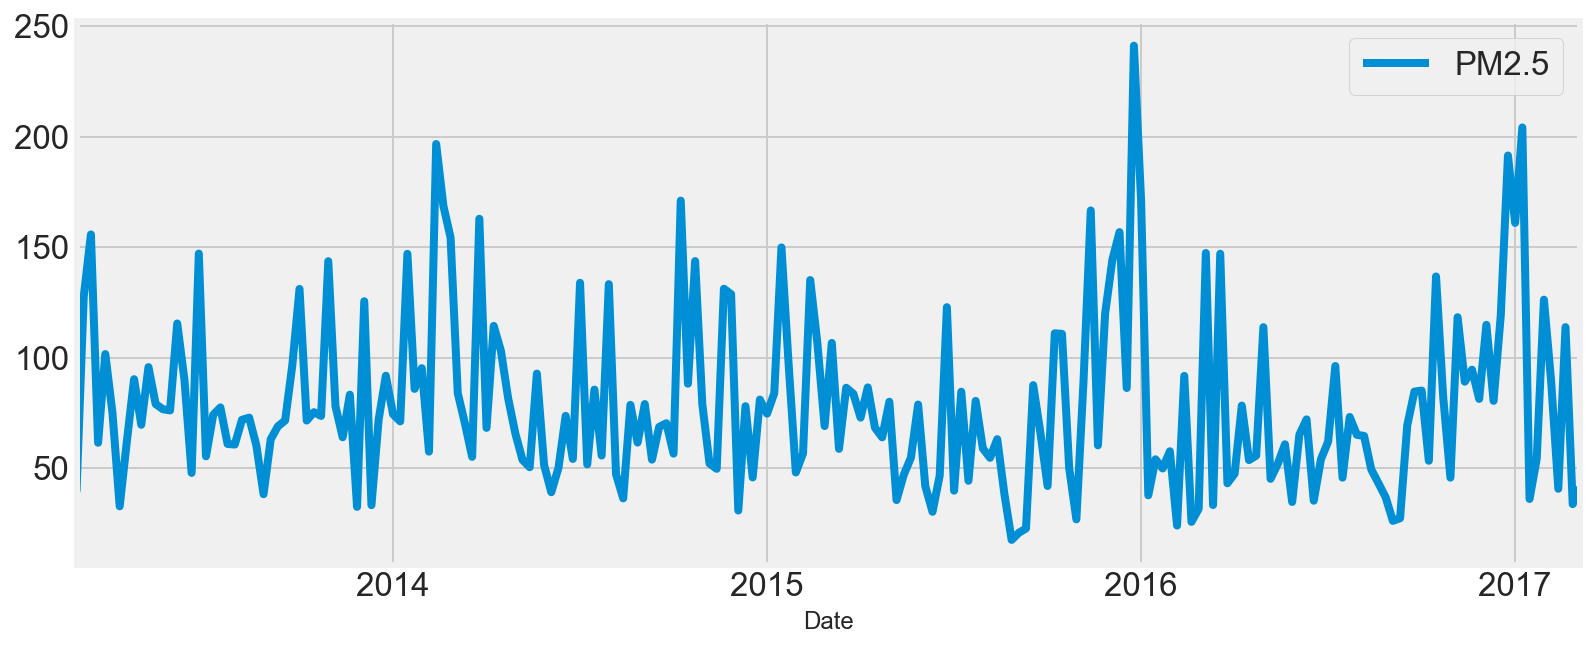

In [14]:
pm25_rate.plot(lw=4, figsize=(12, 5))
plt.show()

In [15]:
data = pm25_rate

model = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model.fit(data)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1027.012
Date:                              Sat, 13 Nov 2021   AIC                           2066.025
Time:                                      20:27:46   BIC                           2085.724
Sample:                                           0   HQIC                          2073.999
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0703      0.618     -0.114      0.909      -1.281       1.140
ar.L1         -0.6554      0.063    -10.348      0.000      -0.780      -0.531
ar.L2         -0.3681      0.063     -5.882      0.000      -0.491      -0.245
ar.S.L12       0.2283      0.110      2.075      0.038       0.013       0.444
ma.S.L12      -0.9062      0.114     -7.946      0.000      -1.130      -0.683
sigma2      1822.6762    170.964     10.661      0.000    1487.593    2157.760
===================================================================================
Ljung-Box (L1) (Q):                   1.08   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.30   Prob(JB):                         0.19
Heteroskedasticity (H):               1.24   Skew:                             0.12
Prob(H) (two-sided):                  0.39   Kurtosis:                         3.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

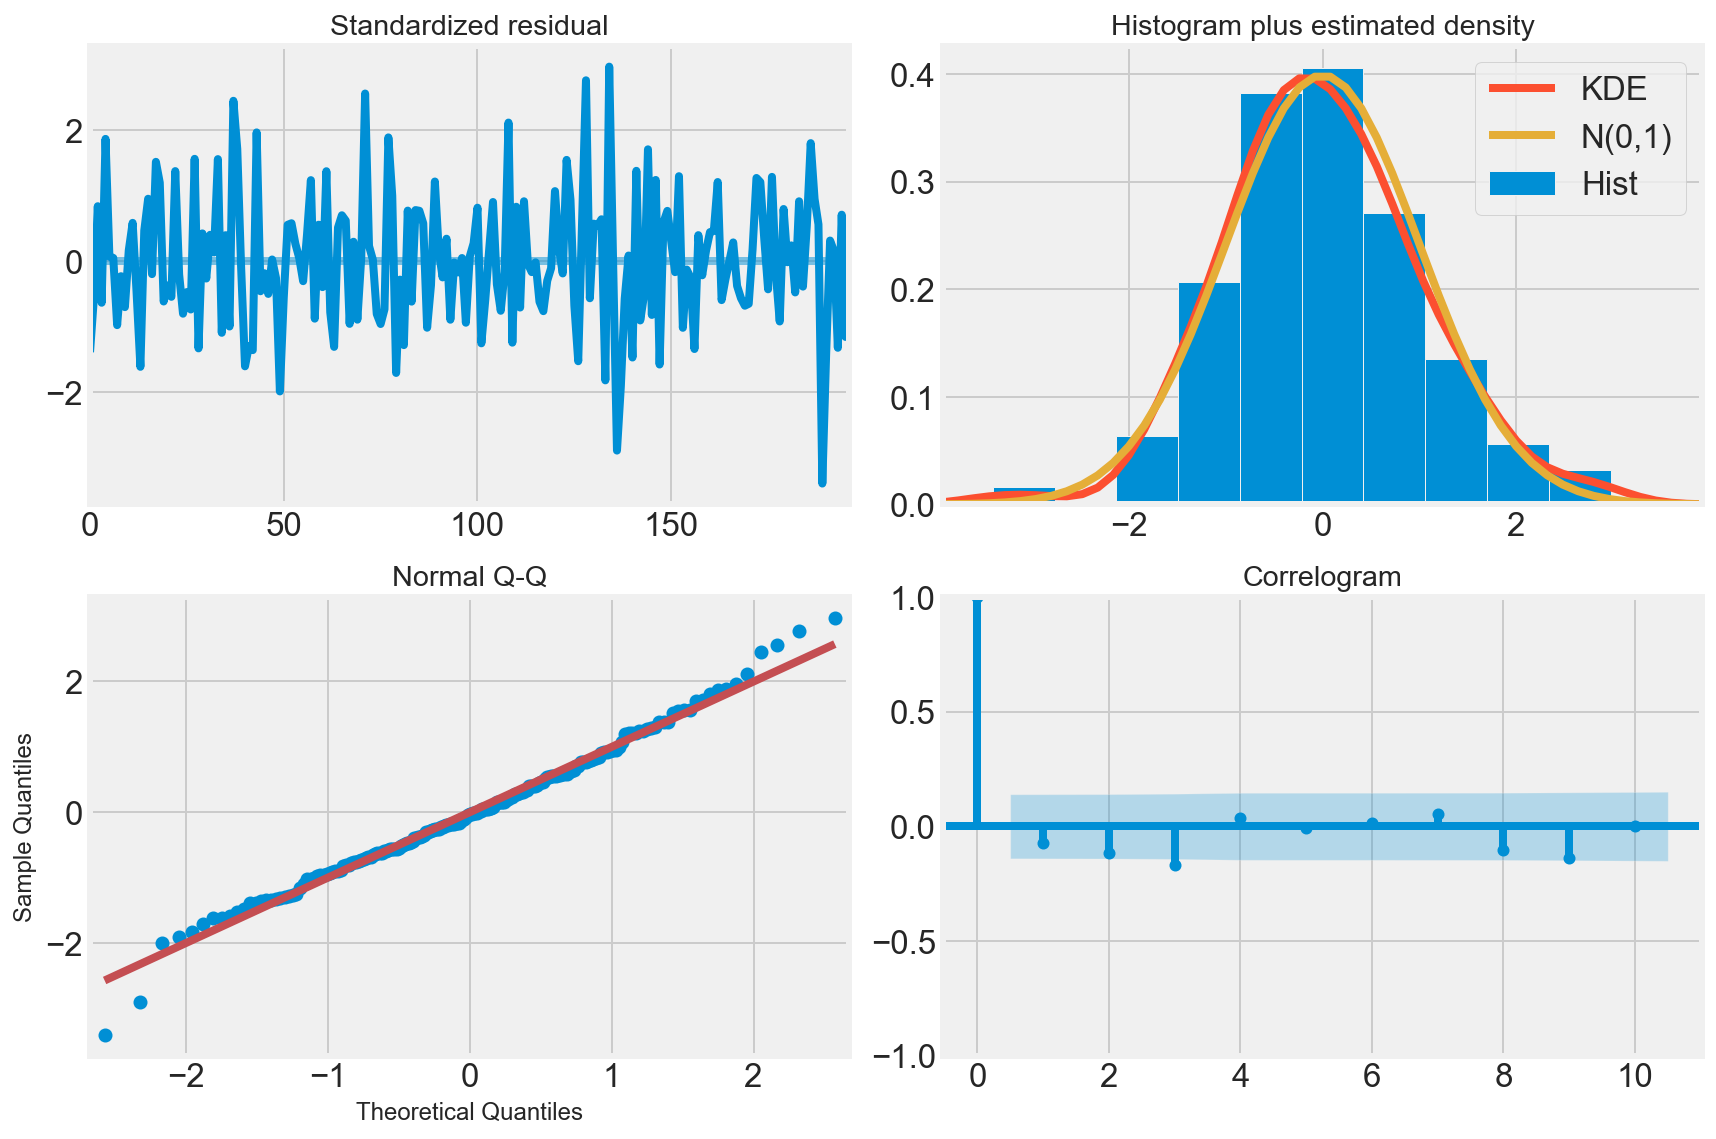

In [16]:
model.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [17]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)

In [18]:
# Confidence intervals not useful before one season completed
ci.head(13)

lower        upper
2013-03-10 -1924.653156  2003.215683
2013-03-17 -1836.653219  2091.211895
2013-03-24 -1808.233642  2119.630731
2013-03-31 -1902.219054  2025.644396
2013-04-07 -1862.397158  2065.466063
2013-04-14 -1889.092841  2038.770366
2013-04-21 -1931.061102  1996.802080
2013-04-28 -1901.817064  2026.046069
2013-05-05 -1873.765598  2054.097414
2013-05-12 -1894.254162  2033.608764
2013-05-19 -1868.256966  2059.605410
2013-05-26 -1292.144090  1489.411212
2013-06-02    40.081624   289.490243

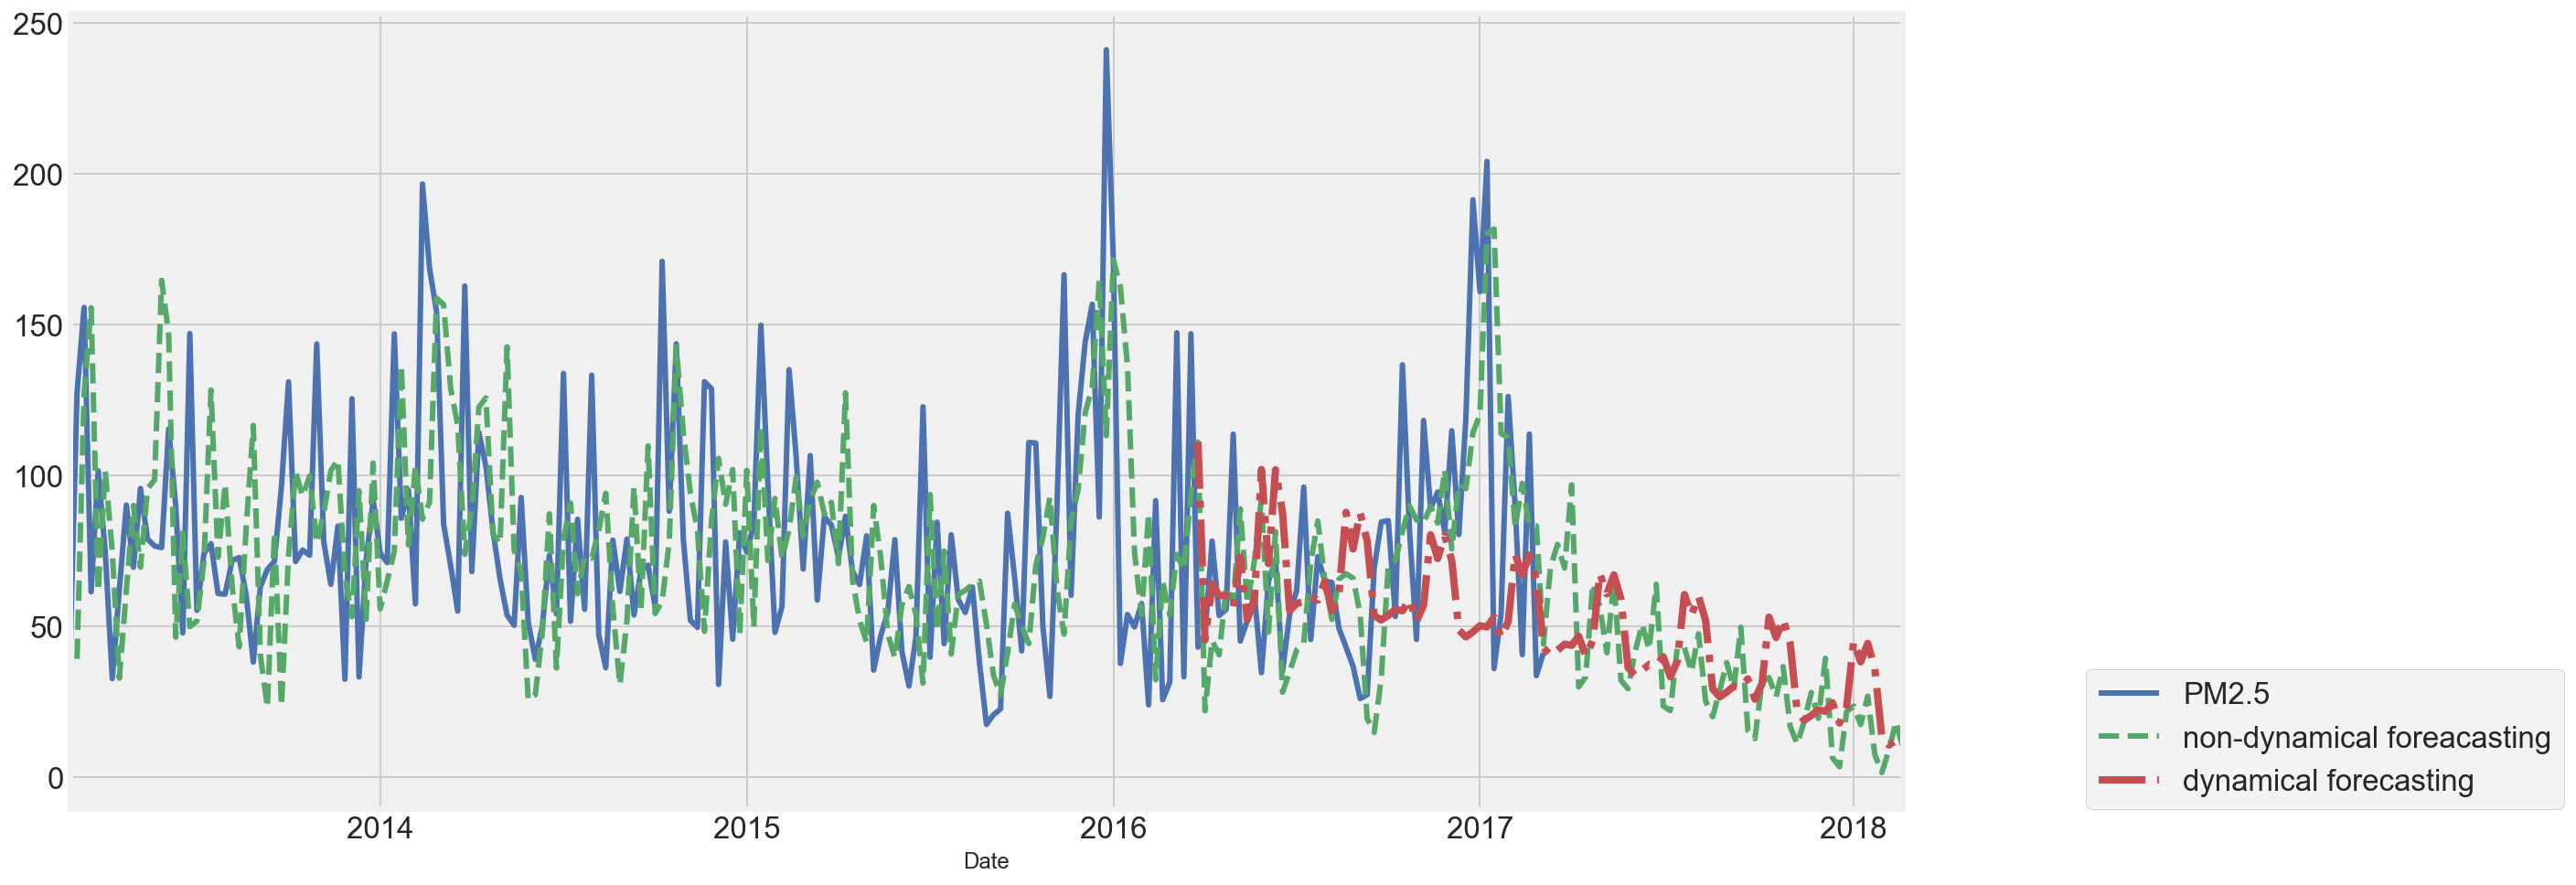

In [19]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)

preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(data[1:], preds[:len(data)-1])

1985.62781144157

In [21]:
def rolling(timeseries, window=12, figsize=(12, 8)):
    '''
    Plot original timeseries, 
    rolling mean over given window size and 
    rolling mean plus/minus standard deviation
    '''

    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    # Plot rolling statistics:
    fig = plt.figure(figsize=figsize)
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    
    std_plus = plt.plot(rolmean+rolstd, color='red', ls='--',label='Rolling Mean +/- Rolling Std')
    
    std_minus = plt.plot(rolmean-rolstd, color='red', ls='--', label='')
    
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()


In [22]:
def autocorrelation_plot(y, lags=20, alpha=0.05):
    """
    Plot autocorrelations and partial autocorrelations
    Arguments:
    y: Time series
    lags: Number of lags to plot
    alpha: Confidence level for random noise
    """

    se = stats.norm().ppf(1-alpha/2)/np.sqrt(len(y))

    fig, ax = plt.subplots(ncols=2, figsize=(12, 4), sharey=True)

    plot_acf(y, lags=lags, alpha=alpha, ax=ax[0])
    ax[0].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)

    plot_pacf(y, lags=lags, alpha=alpha, ax=ax[1], method='ywmle')
    ax[1].hlines(np.array([-1, 1])*se, 1, lags, linestyles='--', lw=1)
    plt.show()

In [23]:
def test_and_vis(timeseries):
    '''
    plot timeseries with rolling mean and autocorrelations
    '''
    rolling(timeseries)
    autocorrelation_plot(timeseries.dropna())

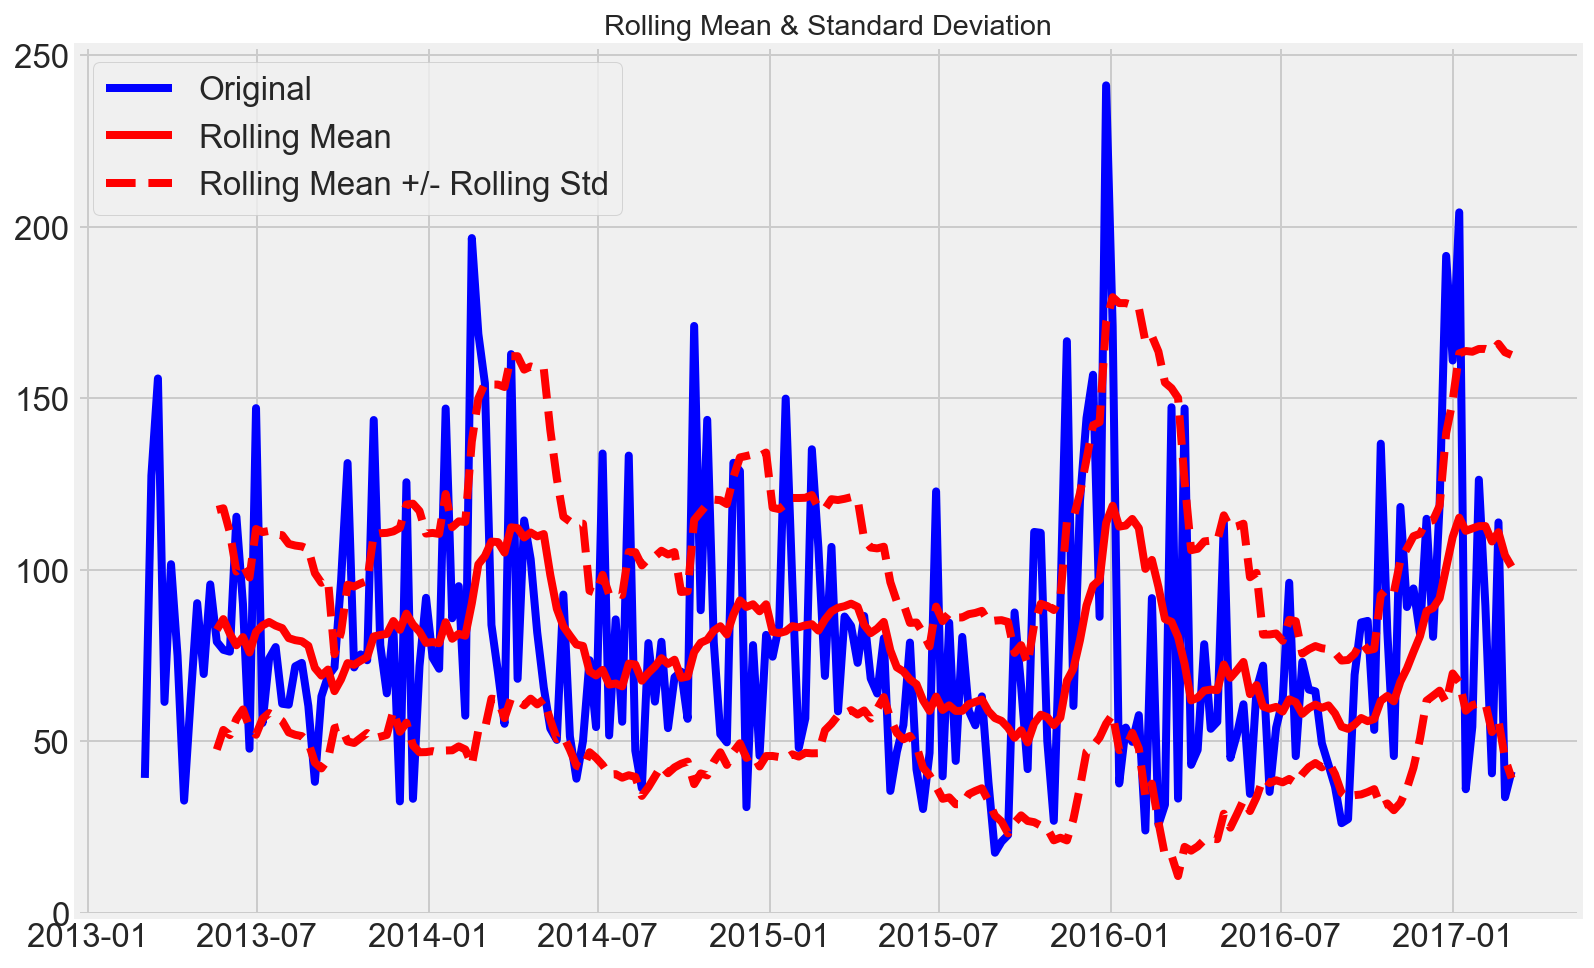

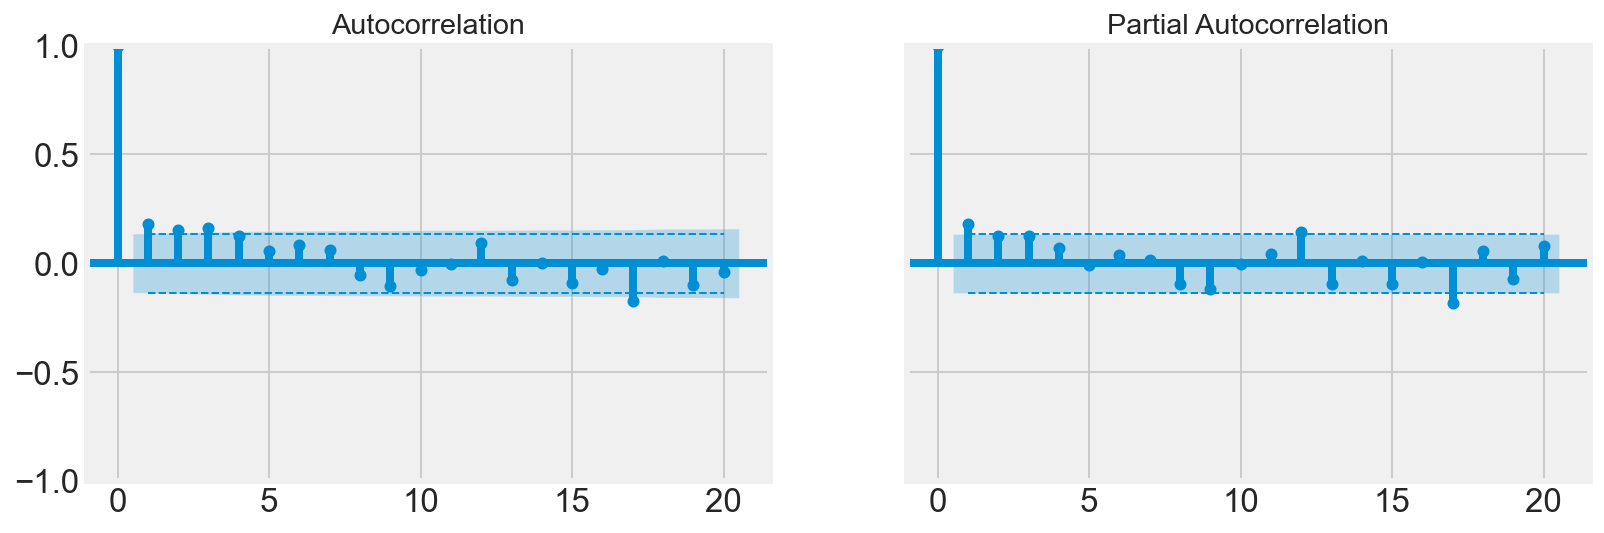

In [24]:
test_and_vis(pm25_rate)

## PM10 Particulate Matter 10 

In [25]:
pm10_rate = df_weekly[['PM10']]
pm10_rate

PM10
Date                  
2013-03-03   54.868056
2013-03-10  173.327381
2013-03-17  165.871528
2013-03-24   77.979167
2013-03-31  129.342510
...                ...
2017-02-05  101.249989
2017-02-12   59.209602
2017-02-19  134.487164
2017-02-26   46.974301
2017-03-05   63.351021

[210 rows x 1 columns]

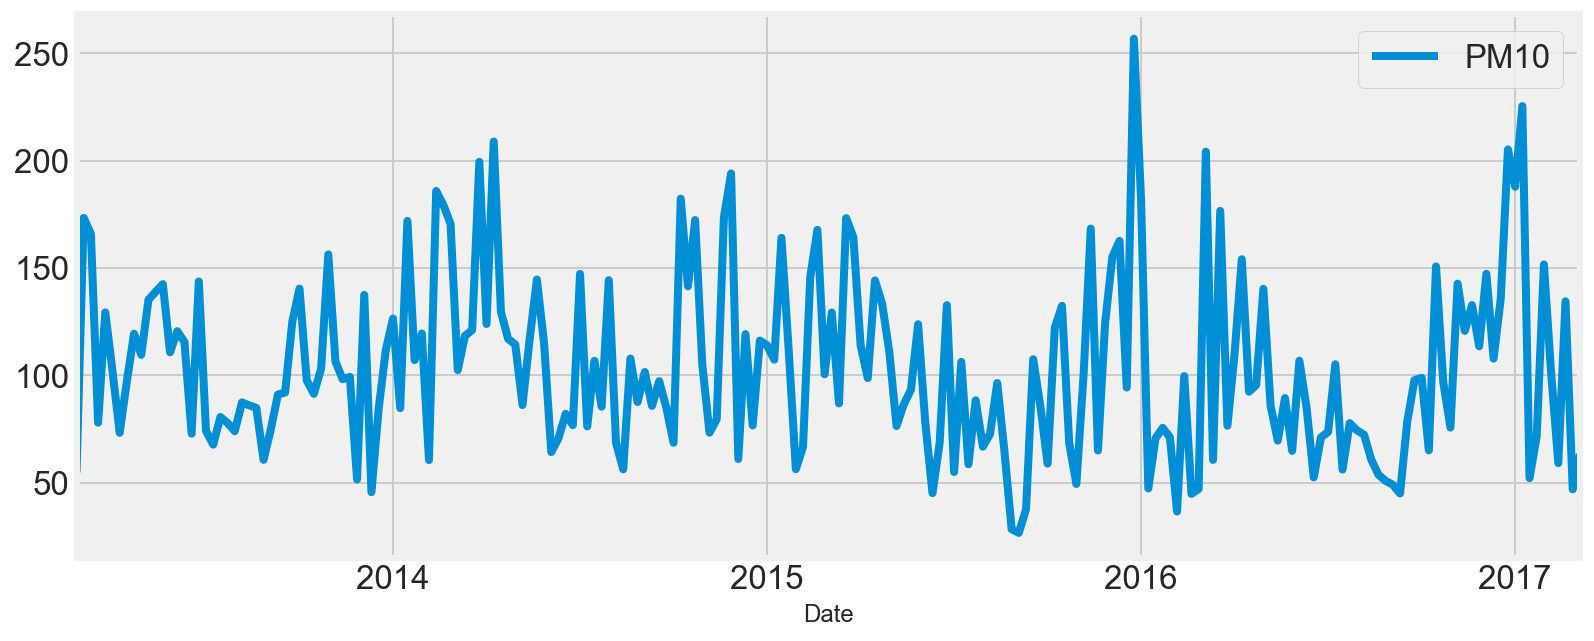

In [26]:
pm10_rate.plot(lw=4, figsize=(12, 5))
plt.show()

In [27]:
data = pm10_rate

model2 = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model2.fit(data)

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1037.084
Date:                              Sat, 13 Nov 2021   AIC                           2086.168
Time:                                      20:27:48   BIC                           2105.867
Sample:                                           0   HQIC                          2094.142
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.1101      0.582     -0.189      0.850      -1.250       1.030
ar.L1         -0.6065      0.067     -9.089      0.000      -0.737      -0.476
ar.L2         -0.3686      0.064     -5.768      0.000      -0.494      -0.243
ar.S.L12       0.2350      0.106      2.216      0.027       0.027       0.443
ma.S.L12      -0.9910      0.939     -1.055      0.291      -2.832       0.850
sigma2      1902.0437   1595.067      1.192      0.233   -1224.231    5028.318
===================================================================================
Ljung-Box (L1) (Q):                   1.30   Jarque-Bera (JB):                 1.27
Prob(Q):                              0.25   Prob(JB):                         0.53
Heteroskedasticity (H):               1.47   Skew:                             0.02
Prob(H) (two-sided):                  0.12   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

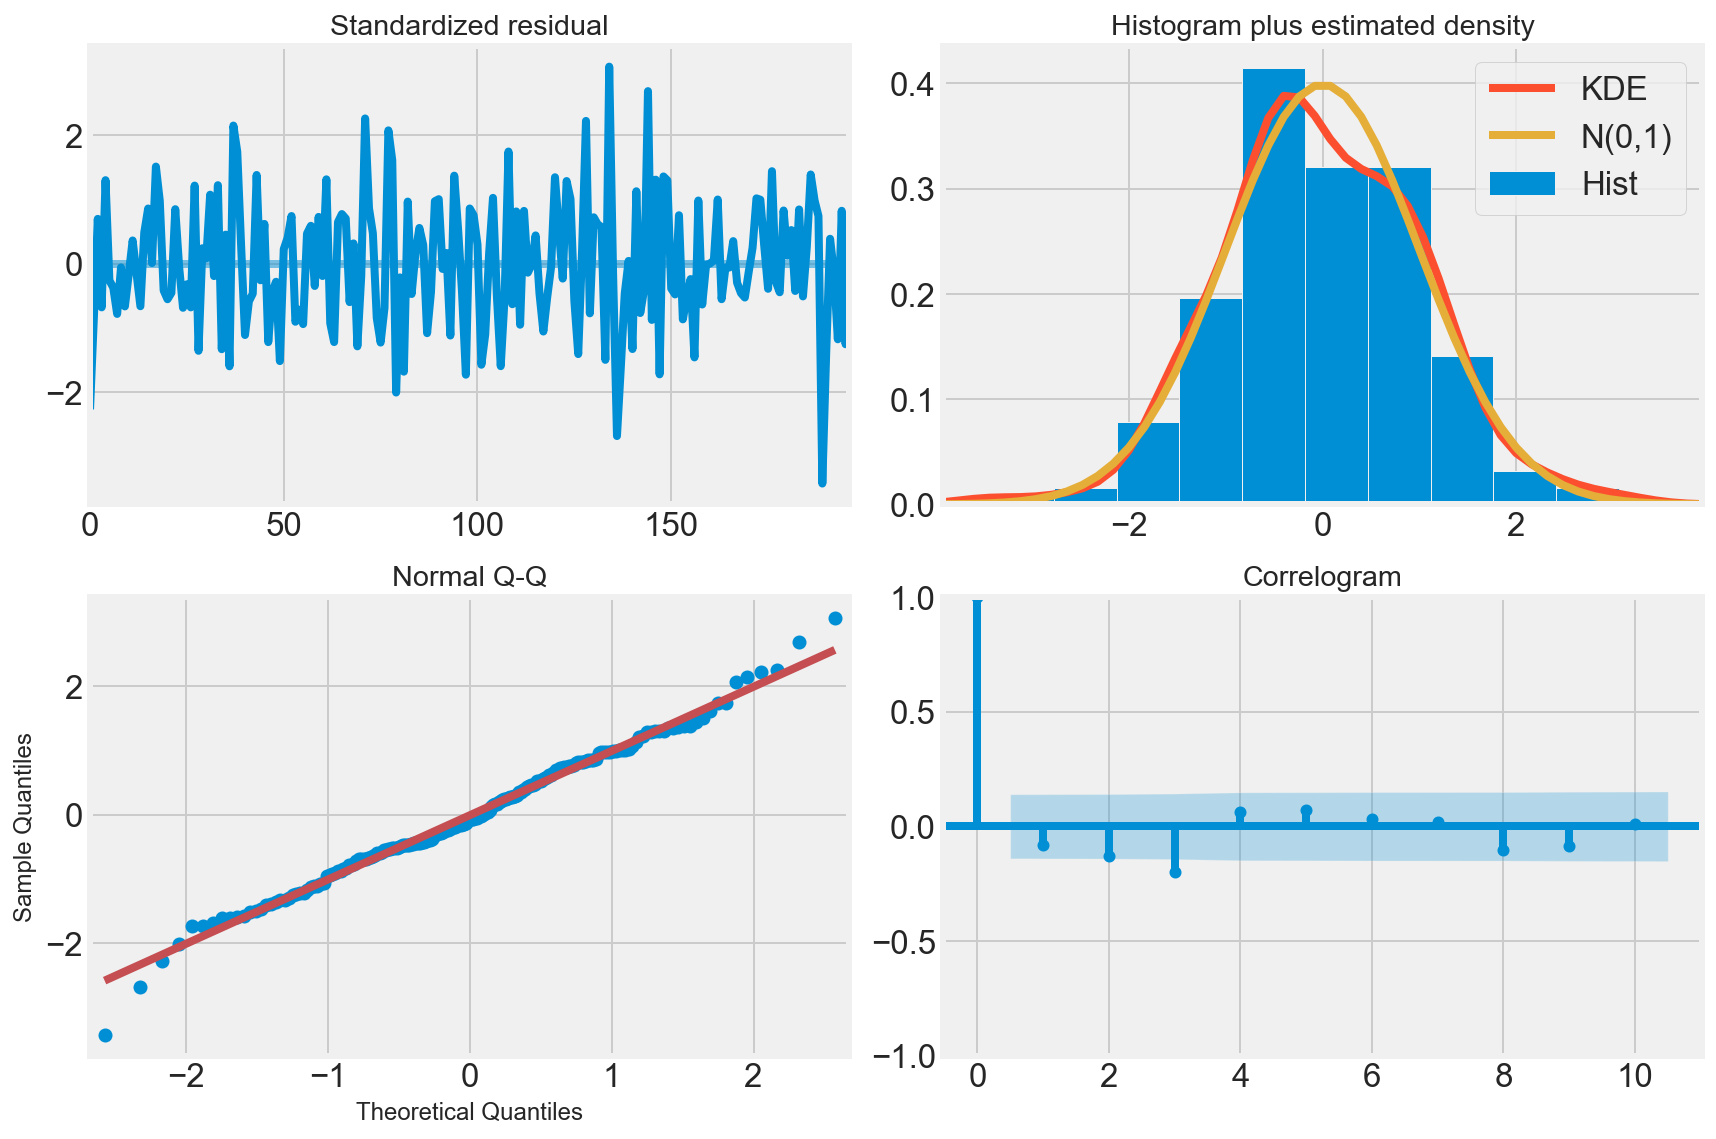

In [28]:
model2.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [29]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model2.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model2.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)
ci.head(13)

lower        upper
2013-03-10 -1909.514853  2018.998592
2013-03-17 -1791.241686  2137.267903
2013-03-24 -1798.466000  2130.042503
2013-03-31 -1886.072309  2042.435120
2013-04-07 -1835.104478  2093.402774
2013-04-14 -1862.332431  2066.174800
2013-04-21 -1890.864733  2037.642477
2013-04-28 -1867.057797  2061.449389
2013-05-05 -1844.969154  2083.537907
2013-05-12 -1854.681861  2073.825077
2013-05-19 -1829.109809  2099.396572
2013-05-26 -1224.981329  1557.364760
2013-06-02   131.099220   390.441423

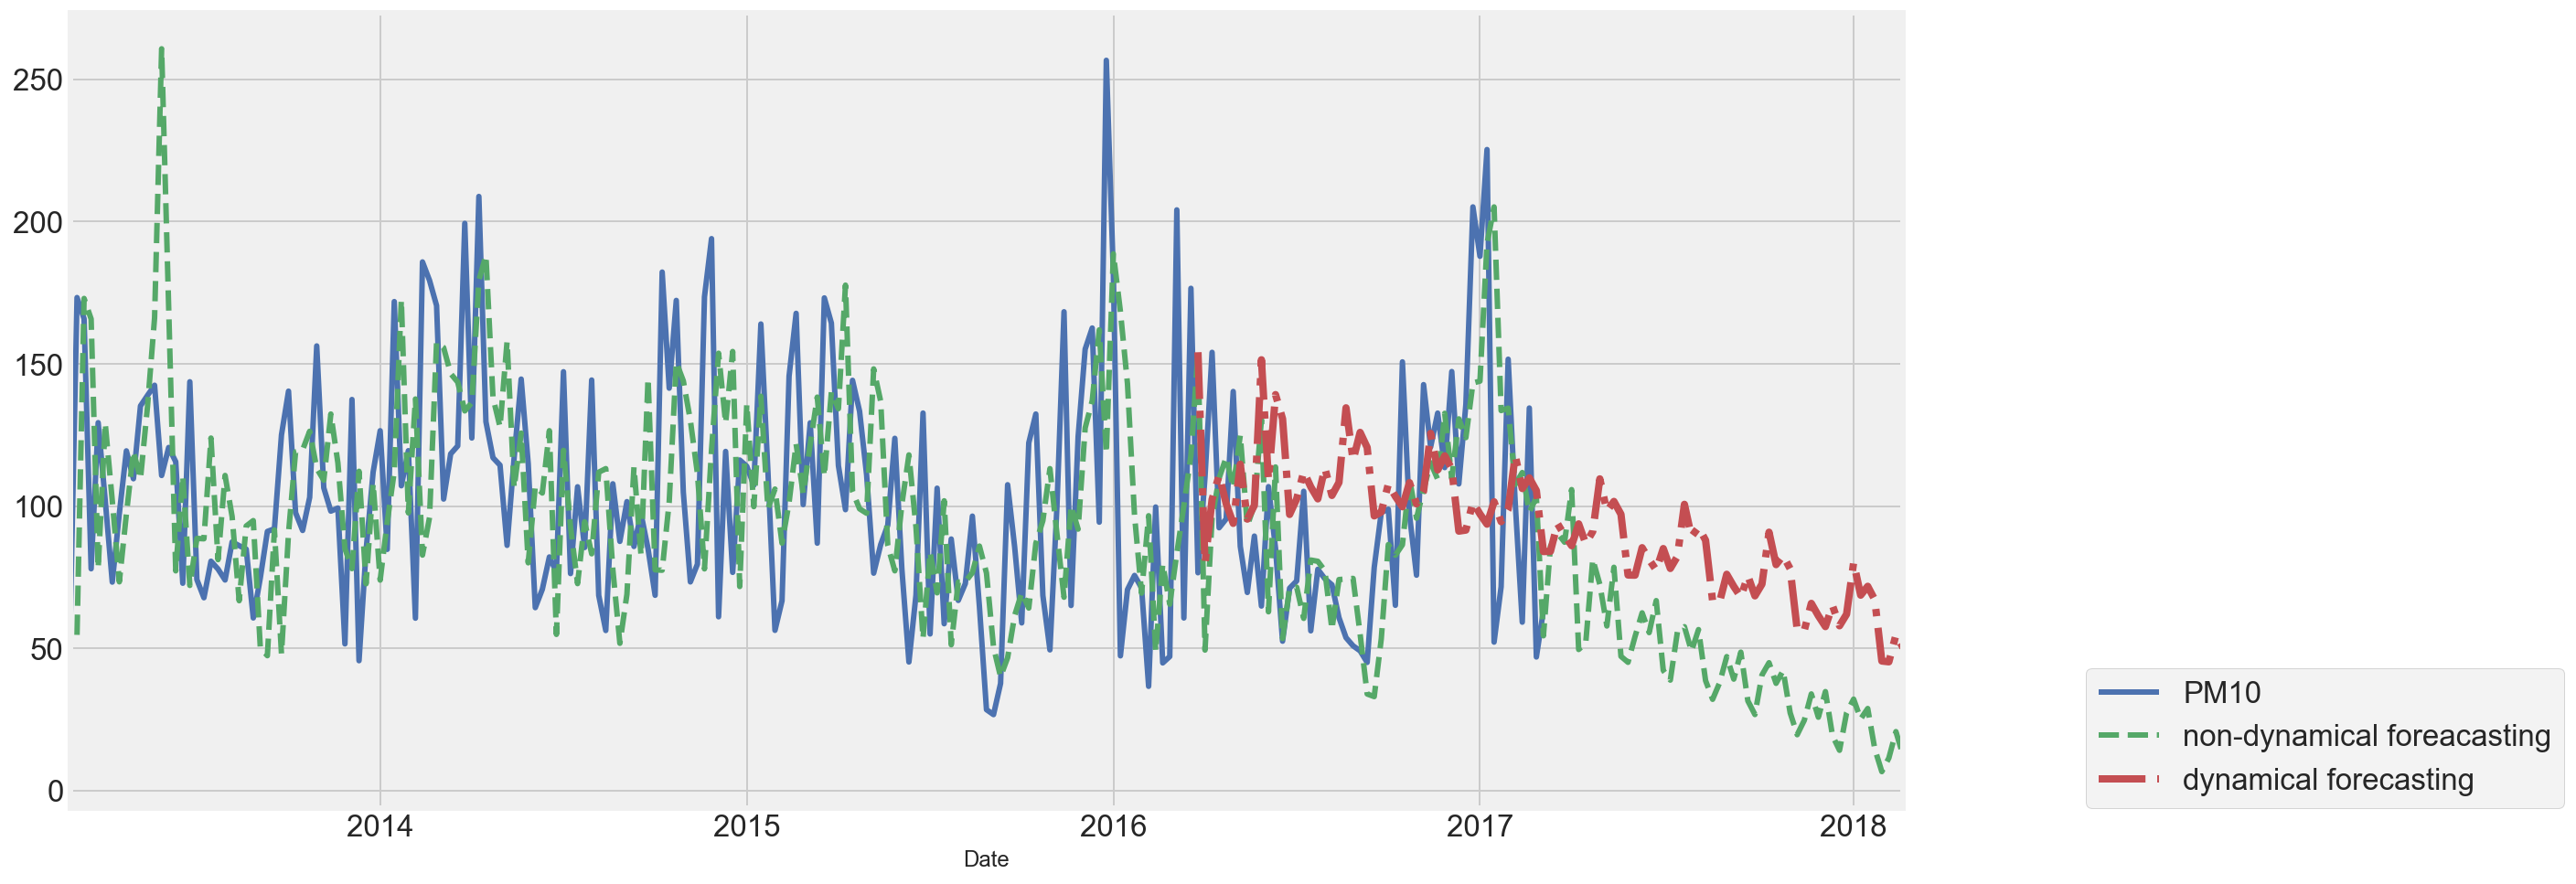

In [30]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

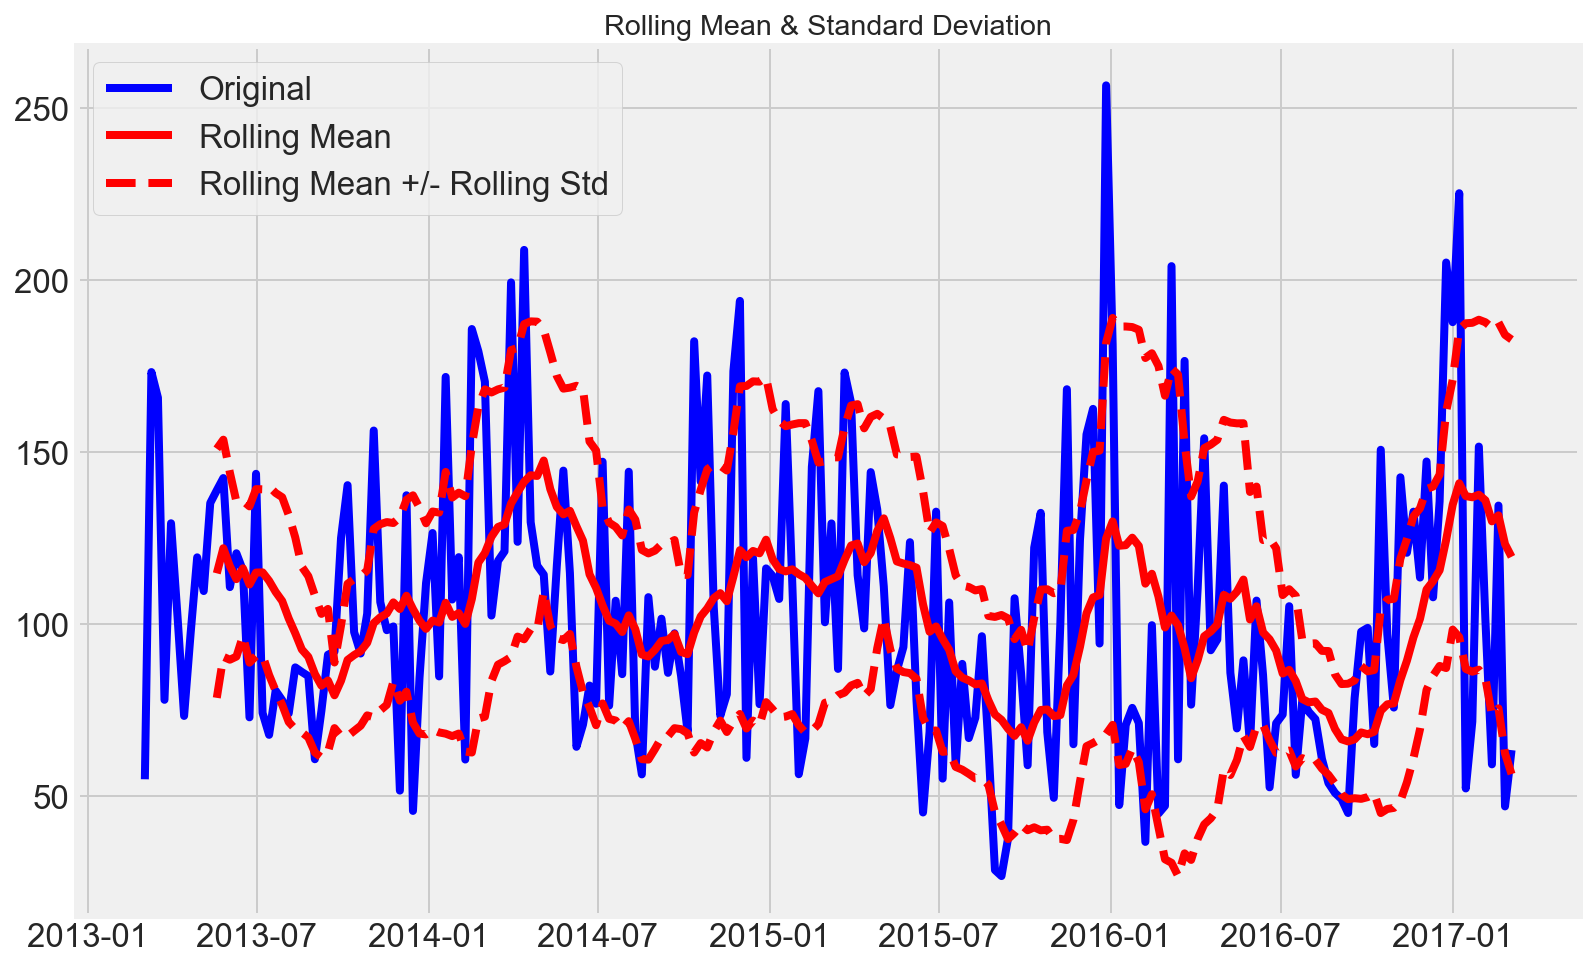

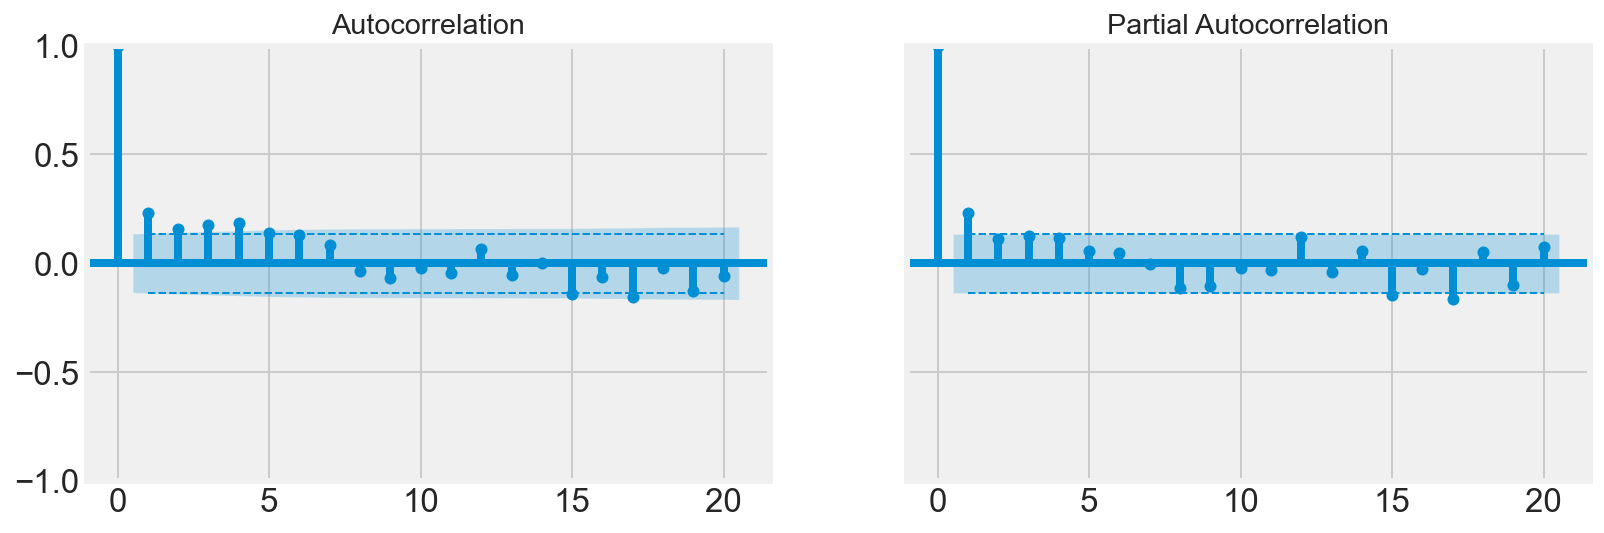

In [31]:
test_and_vis(pm10_rate)

## SO2 - Sulfur dioxide

In [32]:
SO2_rate = df_weekly[['SO2']]
SO2_rate

SO2
Date                 
2013-03-03  30.044293
2013-03-10  54.273529
2013-03-17  54.148313
2013-03-24  16.282738
2013-03-31  31.971502
...               ...
2017-02-05  25.772946
2017-02-12  14.333871
2017-02-19  23.822536
2017-02-26   7.706358
2017-03-05  11.161192

[210 rows x 1 columns]

In [33]:
data = SO2_rate

model3 = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model3.fit(data)

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -696.662
Date:                              Sat, 13 Nov 2021   AIC                           1405.325
Time:                                      20:27:50   BIC                           1425.024
Sample:                                           0   HQIC                          1413.299
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0690      0.152      0.454      0.650      -0.229       0.367
ar.L1         -0.5913      0.061     -9.748      0.000      -0.710      -0.472
ar.L2         -0.3166      0.053     -6.017      0.000      -0.420      -0.213
ar.S.L12       0.0433      0.099      0.436      0.663      -0.151       0.238
ma.S.L12      -0.9991     13.220     -0.076      0.940     -26.911      24.913
sigma2        58.2256    767.175      0.076      0.940   -1445.410    1561.862
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                43.42
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.32   Skew:                             0.20
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

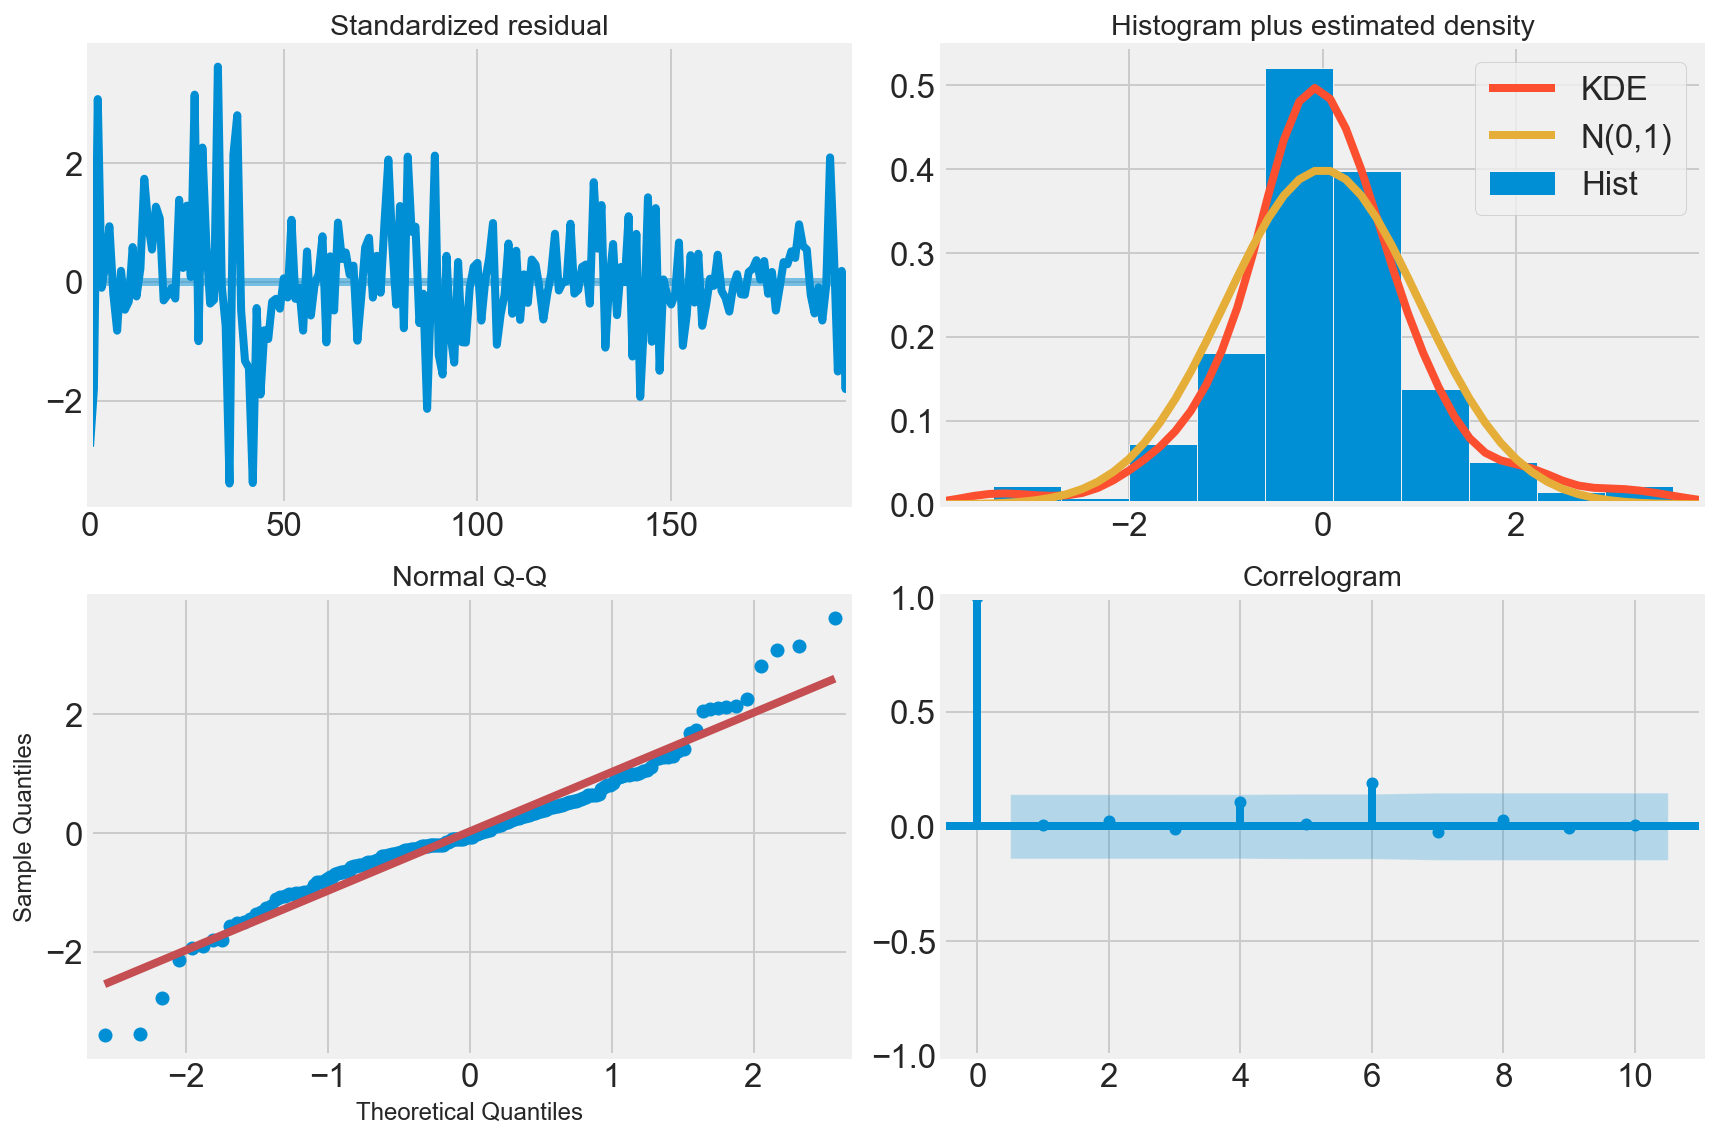

In [34]:
model3.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [35]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model3.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model3.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)
ci.head(13)

lower        upper
2013-03-10 -1930.034958  1990.197071
2013-03-17 -1905.806475  2014.425549
2013-03-24 -1905.929667  2014.302356
2013-03-31 -1943.792382  1976.439641
2013-04-07 -1928.107816  1992.124206
2013-04-14 -1932.616512  1987.615511
2013-04-21 -1949.701426  1970.530597
2013-04-28 -1939.095636  1981.136386
2013-05-05 -1932.184126  1988.047896
2013-05-12 -1937.724958  1982.507064
2013-05-19 -1934.855780  1985.376241
2013-05-26 -1343.474853  1428.664779
2013-06-02    27.028369    75.851517

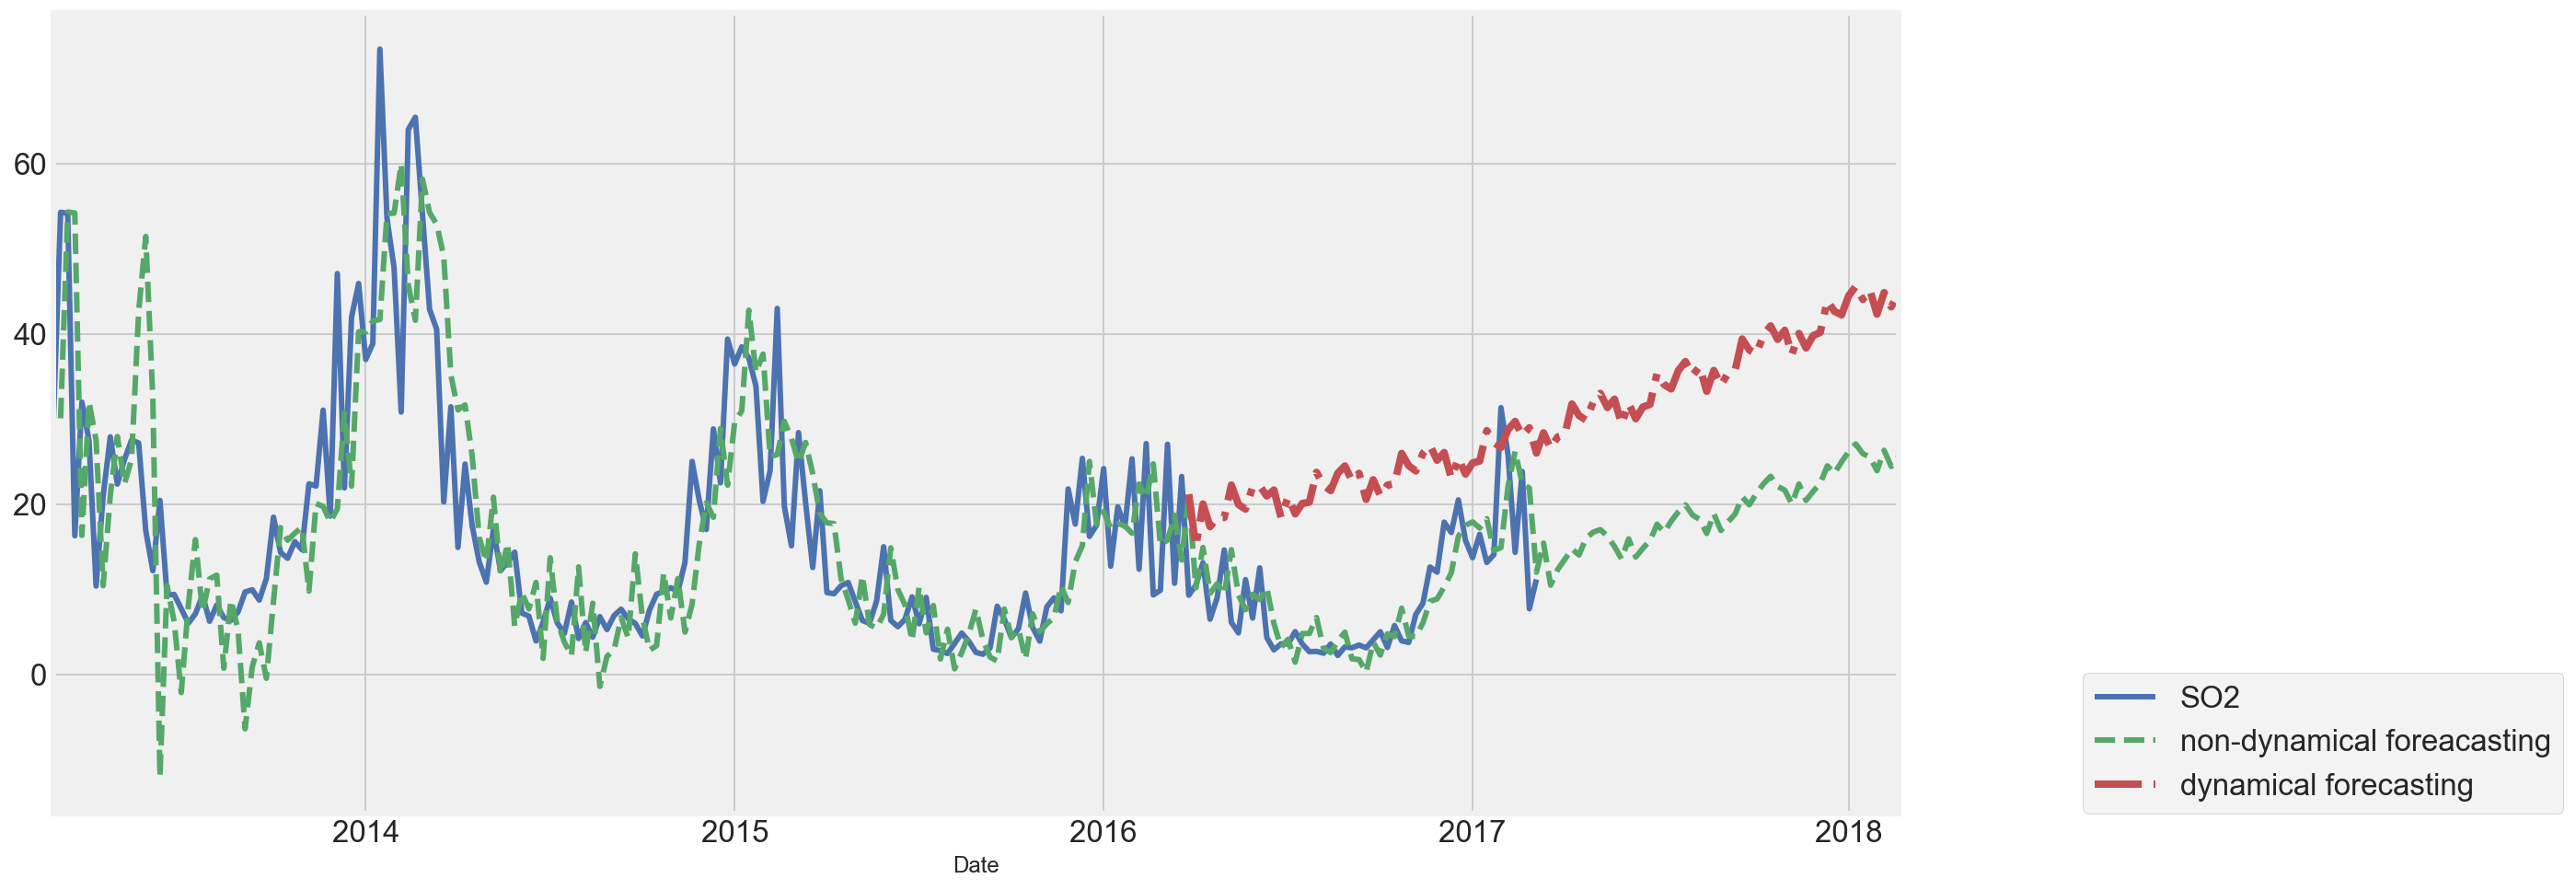

In [36]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

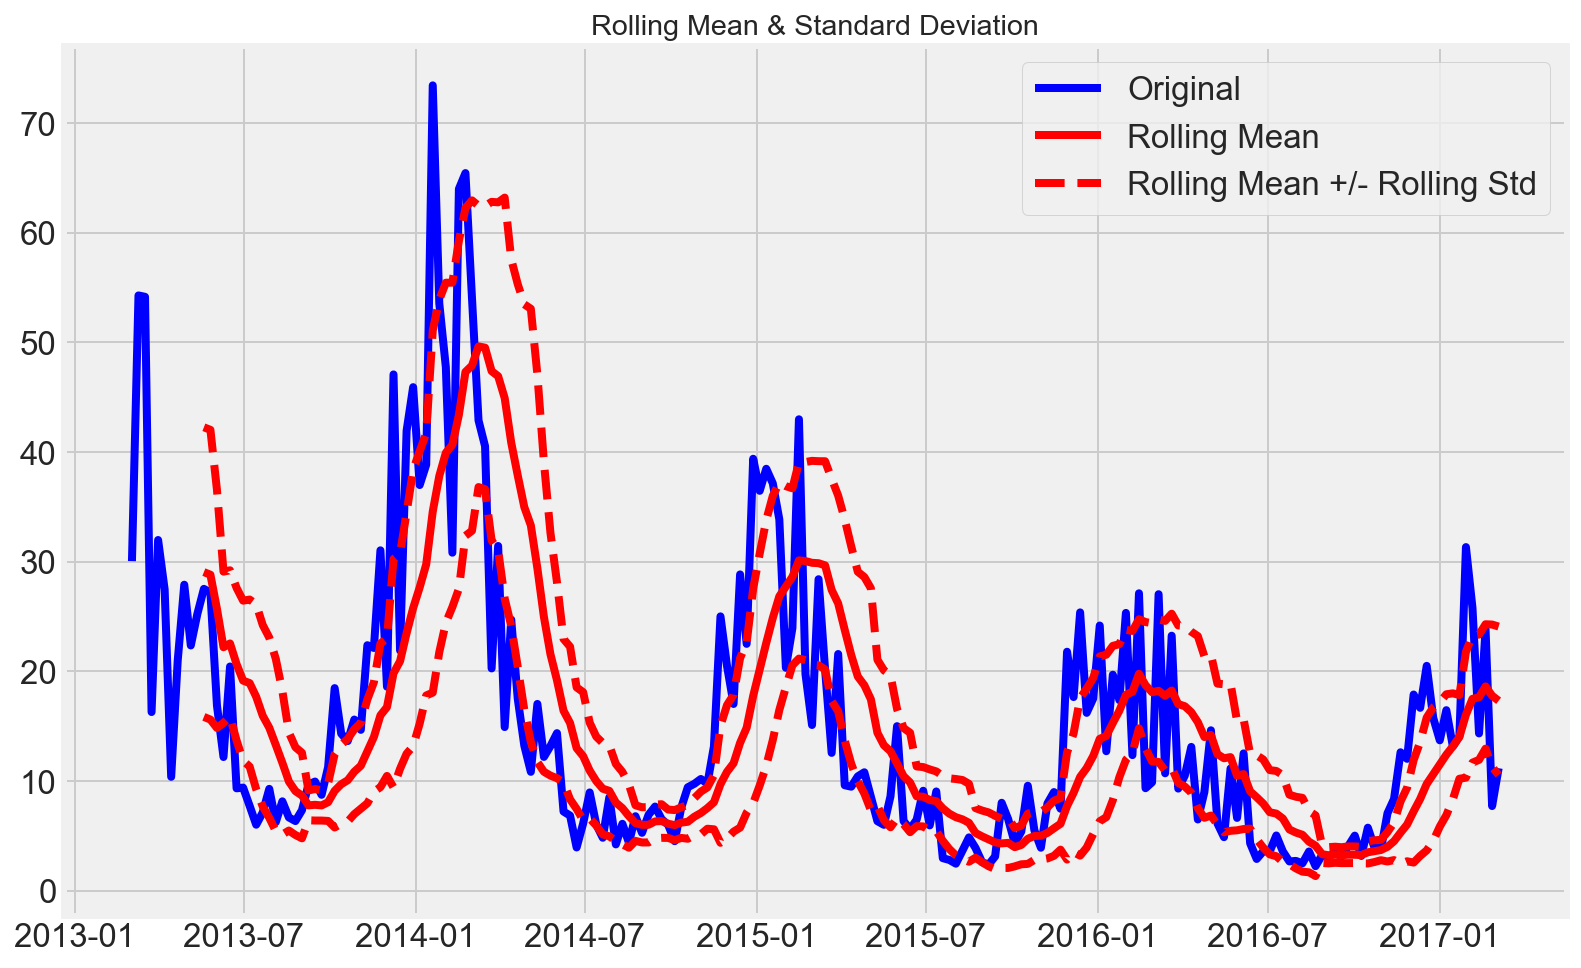

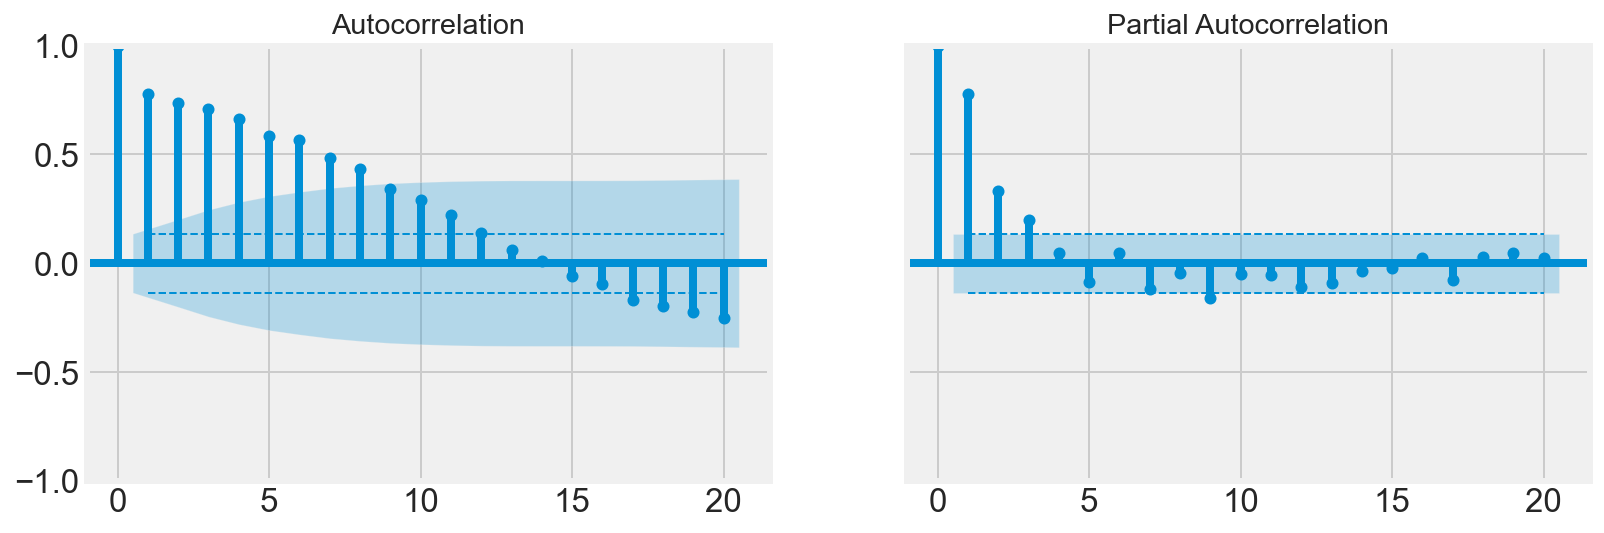

In [37]:
test_and_vis(SO2_rate)

## NO2 - Nitrogen dioxide

In [38]:
NO2_rate = df_weekly[['NO2']]
NO2_rate

NO2
Date                 
2013-03-03  52.920004
2013-03-10  87.369242
2013-03-17  83.345155
2013-03-24  46.390180
2013-03-31  59.117498
...               ...
2017-02-05  49.147147
2017-02-12  37.024537
2017-02-19  69.000795
2017-02-26  40.263832
2017-03-05  53.885113

[210 rows x 1 columns]

In [39]:
data = NO2_rate

model4 = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model4.fit(data)

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -806.759
Date:                              Sat, 13 Nov 2021   AIC                           1625.517
Time:                                      20:27:51   BIC                           1645.216
Sample:                                           0   HQIC                          1633.491
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0518      0.220      0.236      0.814      -0.379       0.483
ar.L1         -0.6093      0.064     -9.514      0.000      -0.735      -0.484
ar.L2         -0.3096      0.064     -4.850      0.000      -0.435      -0.184
ar.S.L12       0.1301      0.108      1.202      0.229      -0.082       0.342
ma.S.L12      -0.8936      0.105     -8.500      0.000      -1.100      -0.688
sigma2       194.0089     18.811     10.314      0.000     157.141     230.877
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 3.15
Prob(Q):                              0.62   Prob(JB):                         0.21
Heteroskedasticity (H):               1.38   Skew:                            -0.16
Prob(H) (two-sided):                  0.20   Kurtosis:                         3.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

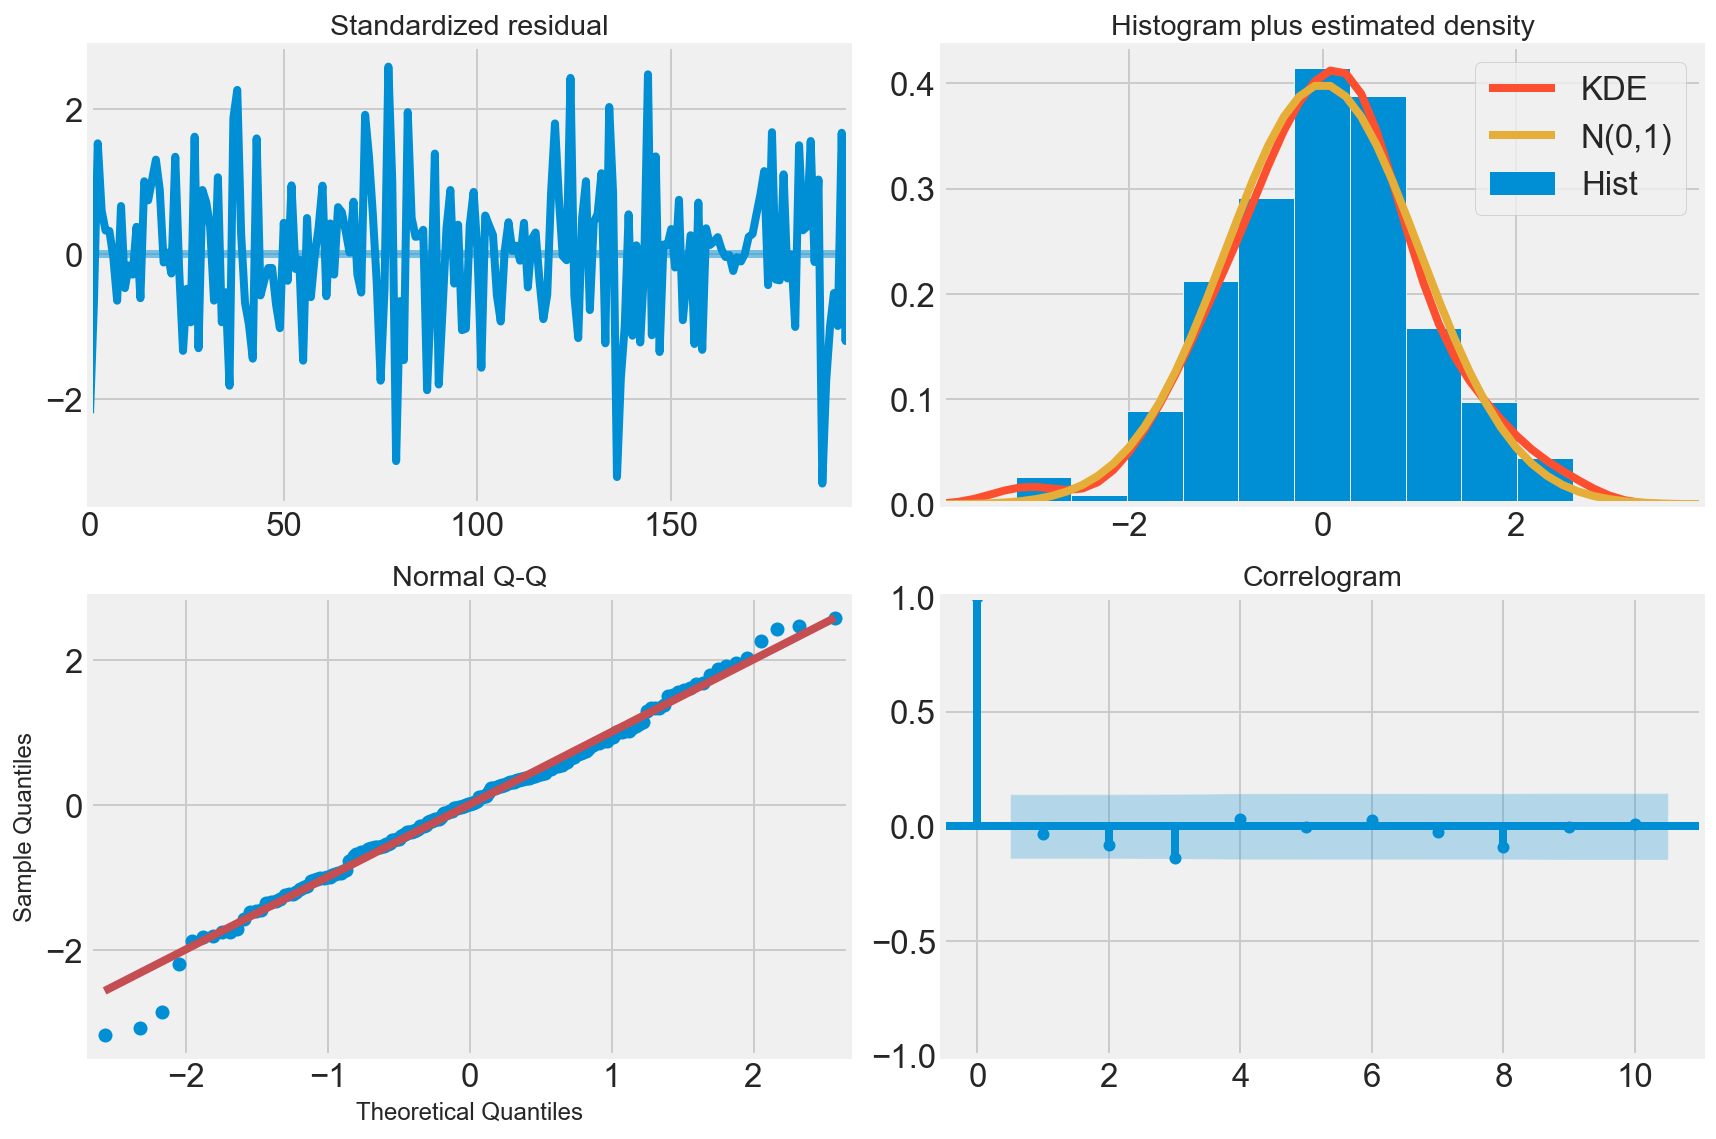

In [40]:
model4.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [41]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model4.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model4.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)
ci.head(13)

lower        upper
2013-03-10 -1907.445590  2013.336918
2013-03-17 -1872.998236  2047.784232
2013-03-24 -1877.012774  2043.769689
2013-03-31 -1913.961137  2006.821320
2013-04-07 -1901.246373  2019.536082
2013-04-14 -1906.794406  2013.988049
2013-04-21 -1920.731143  2000.051312
2013-04-28 -1917.313965  2003.468490
2013-05-05 -1907.249084  2013.533369
2013-05-12 -1917.972725  2002.809728
2013-05-19 -1906.129540  2014.652905
2013-05-26 -1311.010244  1461.787592
2013-06-02    50.462094   132.308846

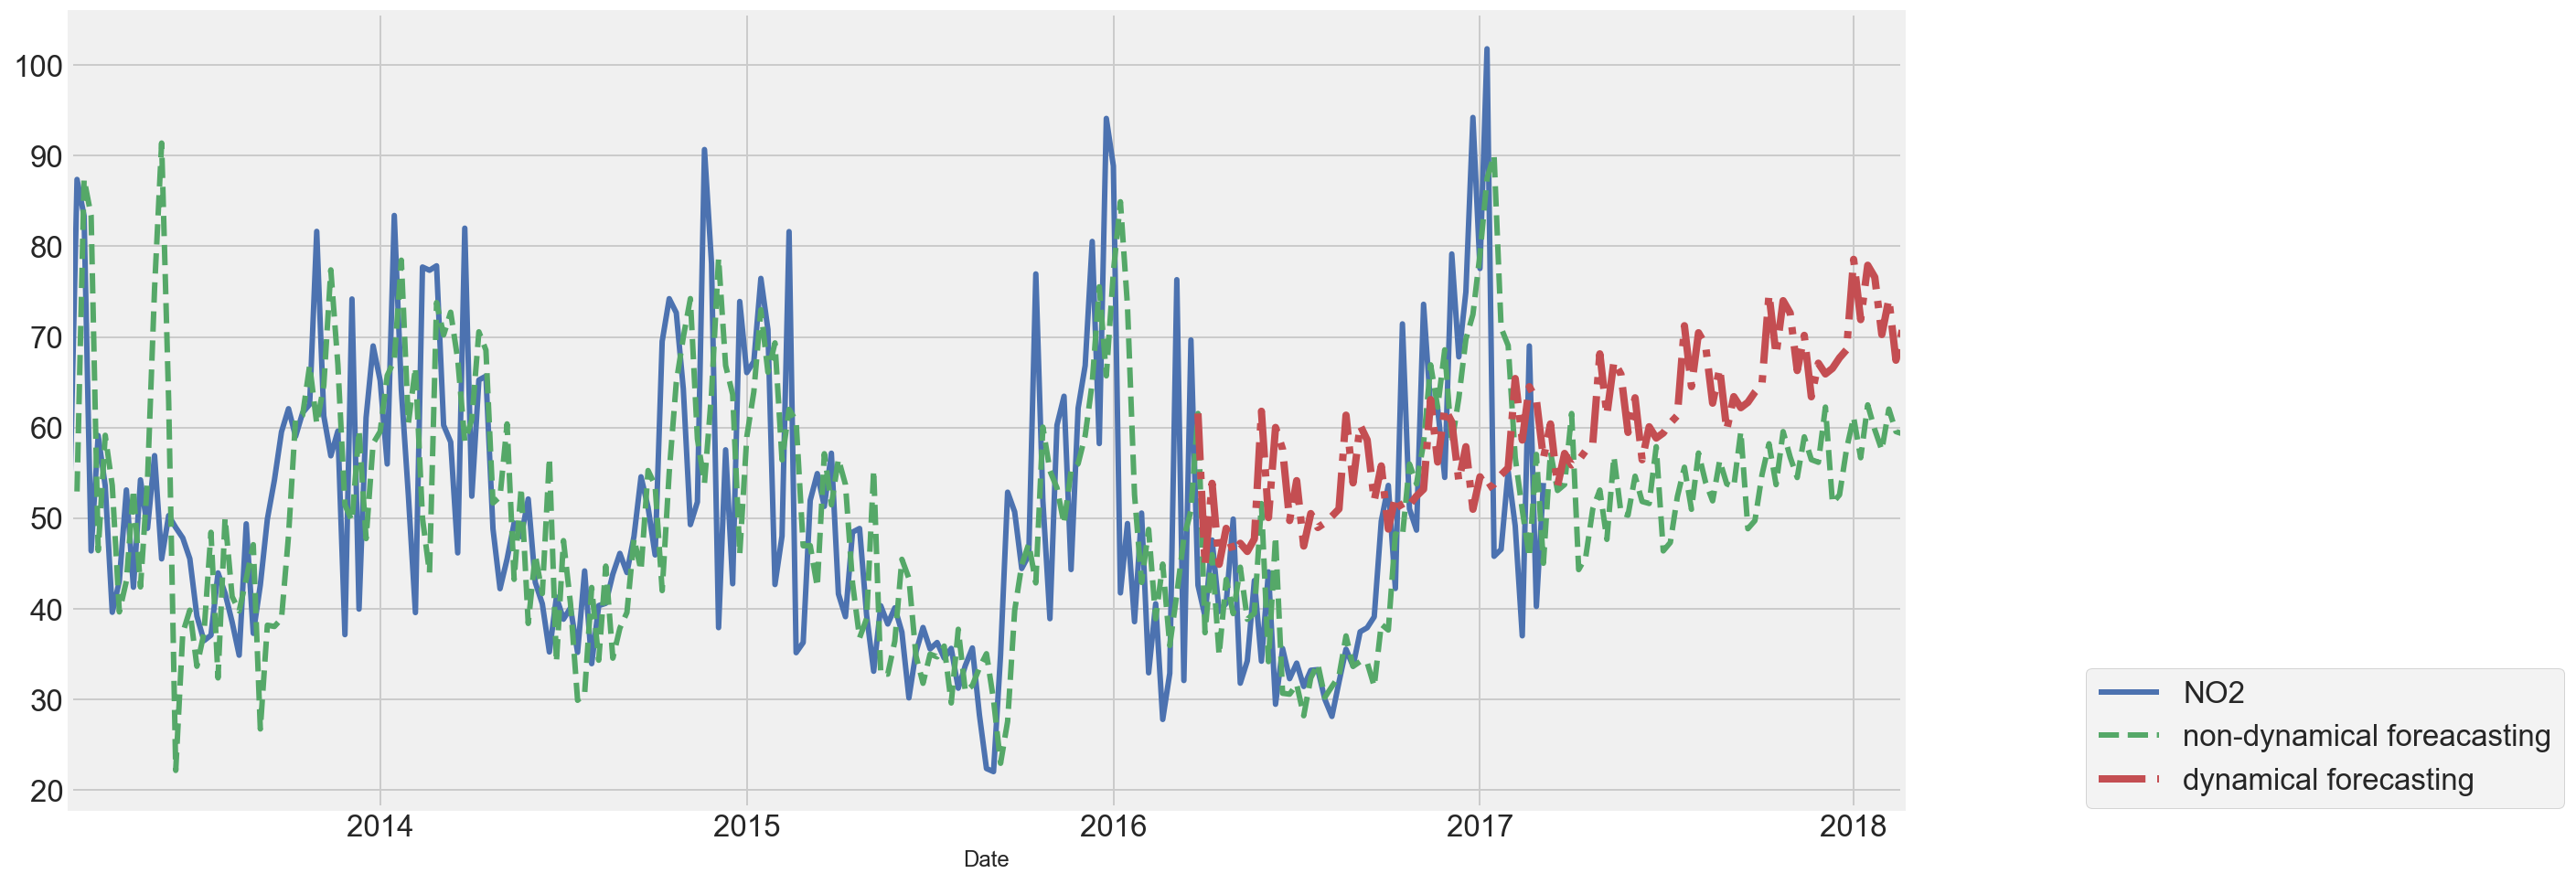

In [42]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

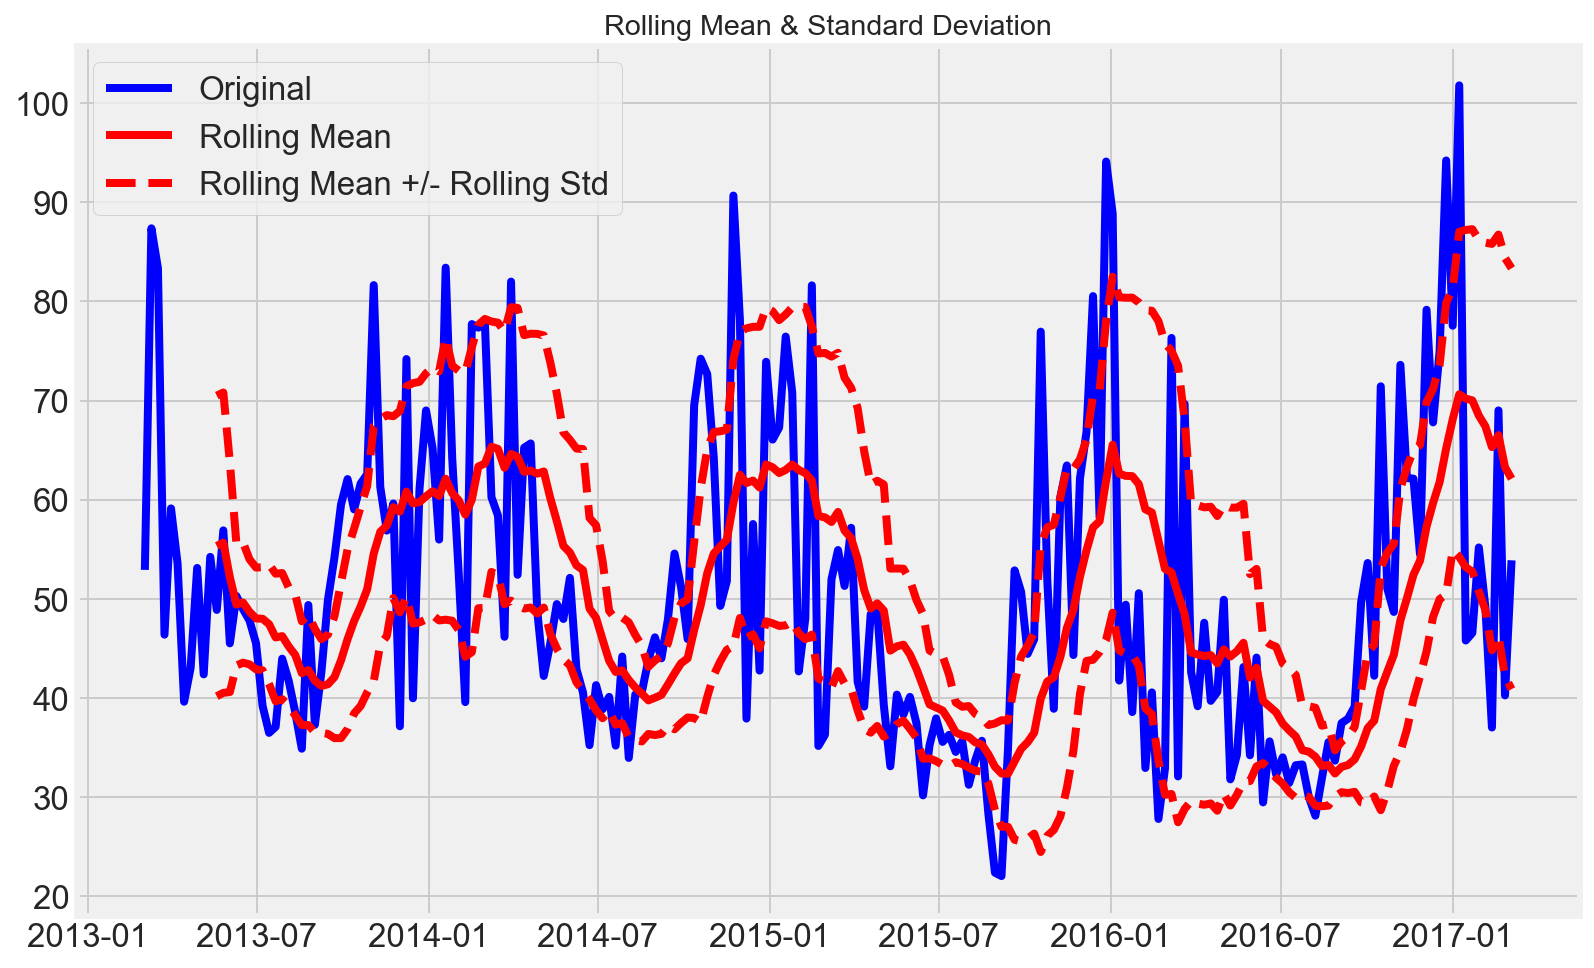

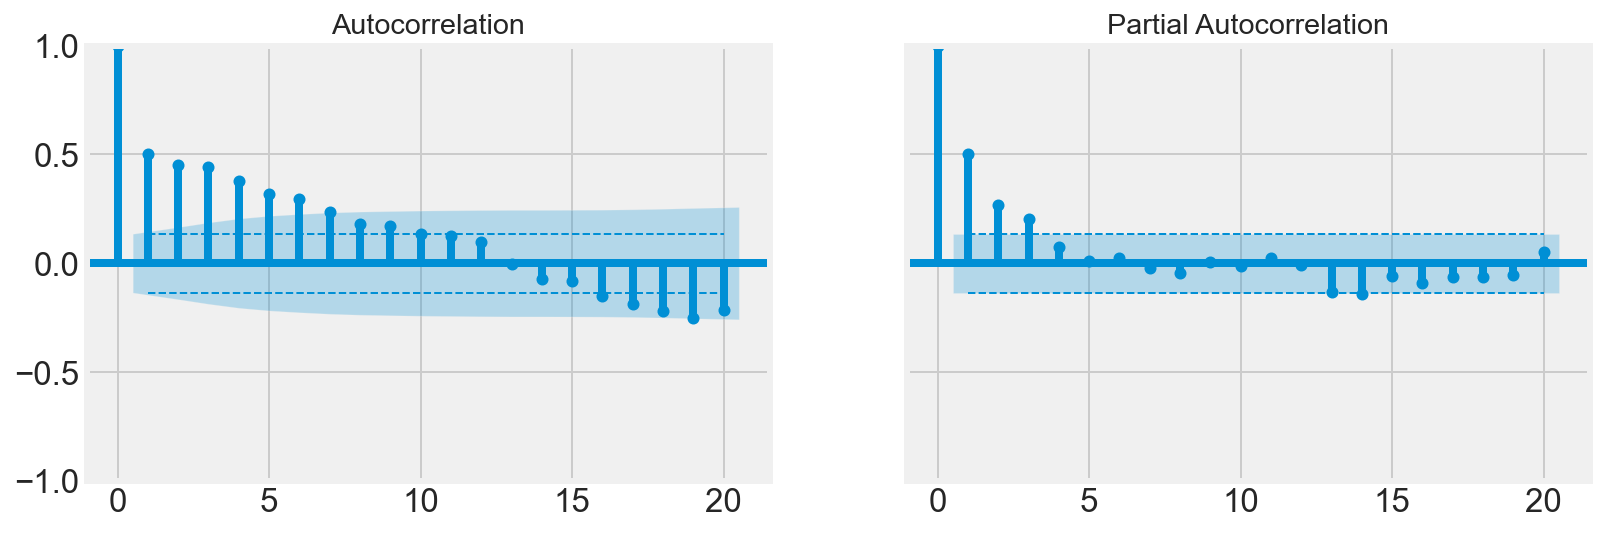

In [43]:
test_and_vis(NO2_rate)

## CO - Carbon monoxide

In [44]:
CO_rate = df_weekly[['CO']]
CO_rate

CO
Date                   
2013-03-03  1044.938657
2013-03-10  1995.890873
2013-03-17  1748.444940
2013-03-24   881.646825
2013-03-31  1215.246032
...                 ...
2017-02-05  1334.751900
2017-02-12   855.727203
2017-02-19  1664.220110
2017-02-26   710.915932
2017-03-05   915.967988

[210 rows x 1 columns]

In [45]:
data = CO_rate

model5 = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model5.fit(data)

model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood               -1521.515
Date:                              Sat, 13 Nov 2021   AIC                           3055.031
Time:                                      20:27:54   BIC                           3074.730
Sample:                                           0   HQIC                          3063.005
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.6056      8.311     -0.073      0.942     -16.895      15.684
ar.L1         -0.5929      0.055    -10.865      0.000      -0.700      -0.486
ar.L2         -0.2630      0.050     -5.254      0.000      -0.361      -0.165
ar.S.L12       0.0729      0.131      0.557      0.577      -0.183       0.329
ma.S.L12      -0.8612      0.114     -7.549      0.000      -1.085      -0.638
sigma2      2.818e+05   1.66e+04     16.986      0.000    2.49e+05    3.14e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):               176.09
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               2.84   Skew:                            -0.45
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

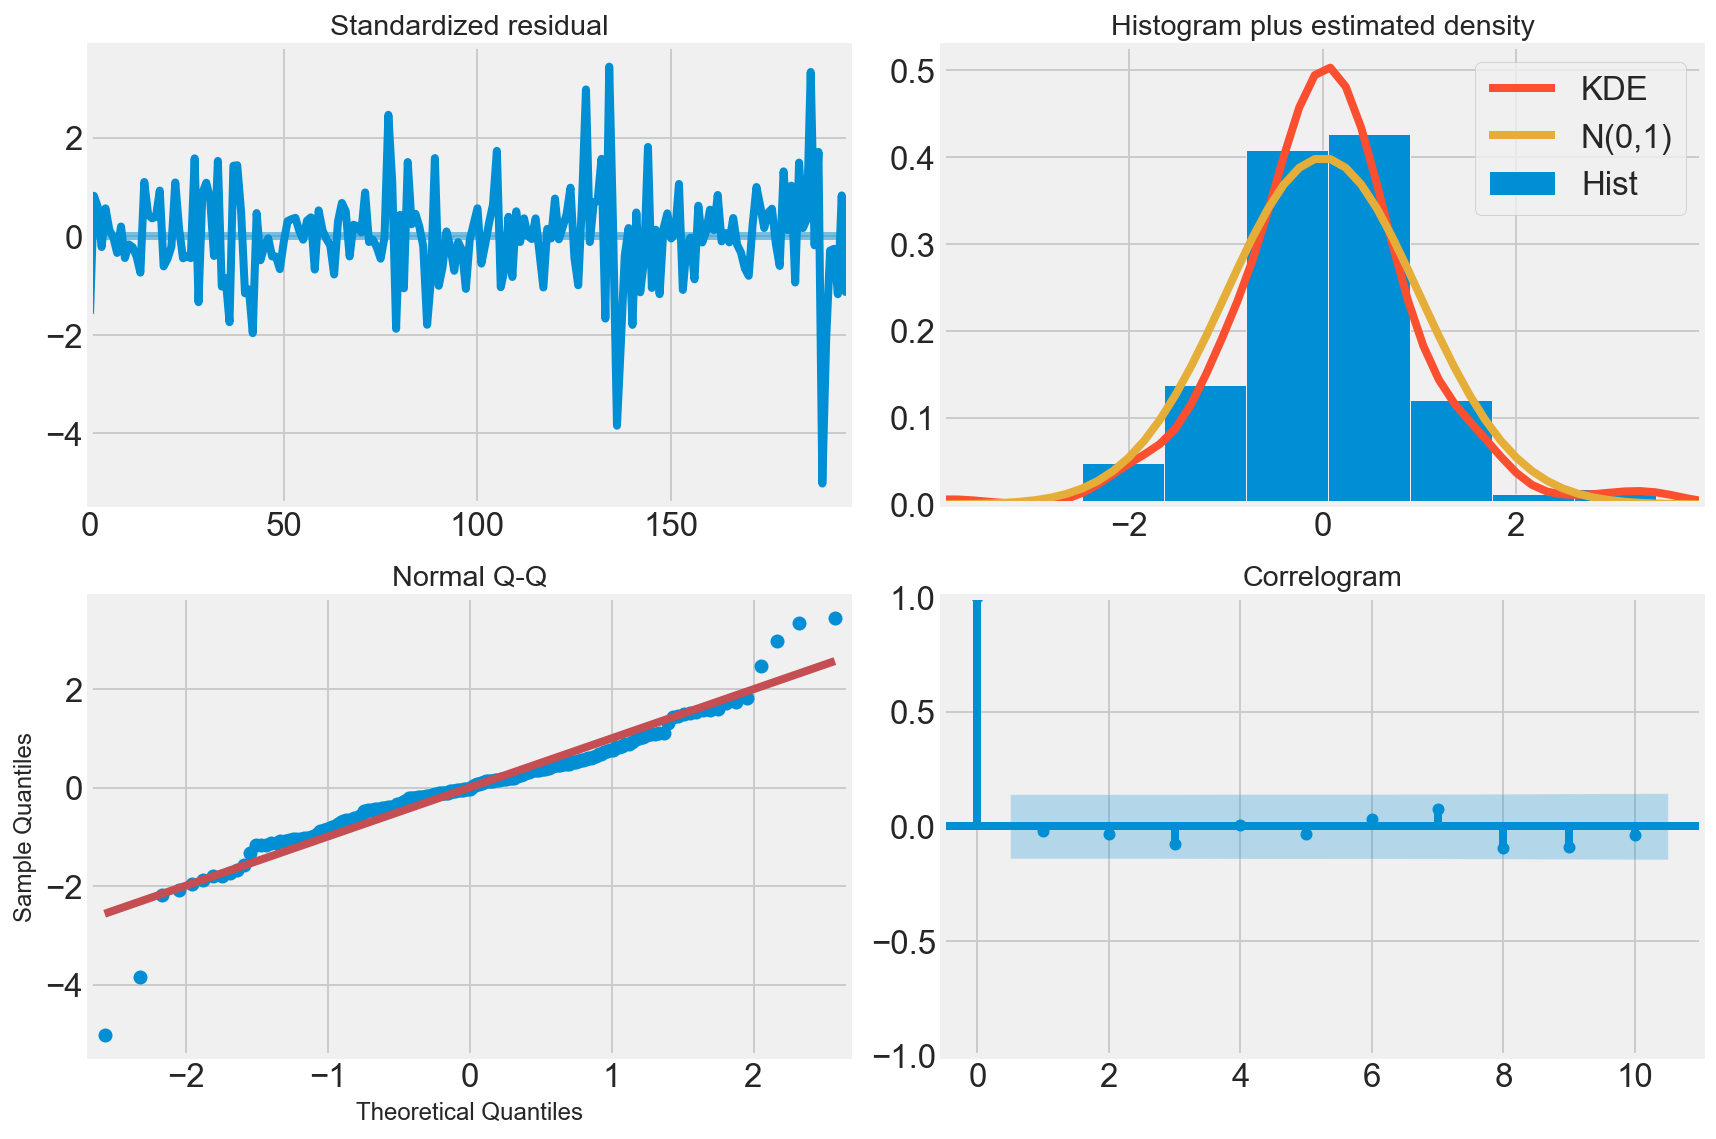

In [46]:
model5.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [47]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model5.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model5.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)
ci.head(13)

lower        upper
2013-03-10 -1550.341834  3404.099817
2013-03-17  -658.704128  4262.751915
2013-03-24  -660.308809  4257.805218
2013-03-31 -1381.419150  3534.790493
2013-04-07 -1309.568351  3606.481853
2013-04-14 -1242.879769  3673.167366
2013-04-21 -1732.184167  3183.840099
2013-04-28 -1655.797408  3260.000905
2013-05-05 -1473.867469  3441.415313
2013-05-12 -1615.992891  3298.912602
2013-05-19 -1447.165308  3457.412113
2013-05-26  -371.393946  3478.731114
2013-06-02   638.802255  3451.778463

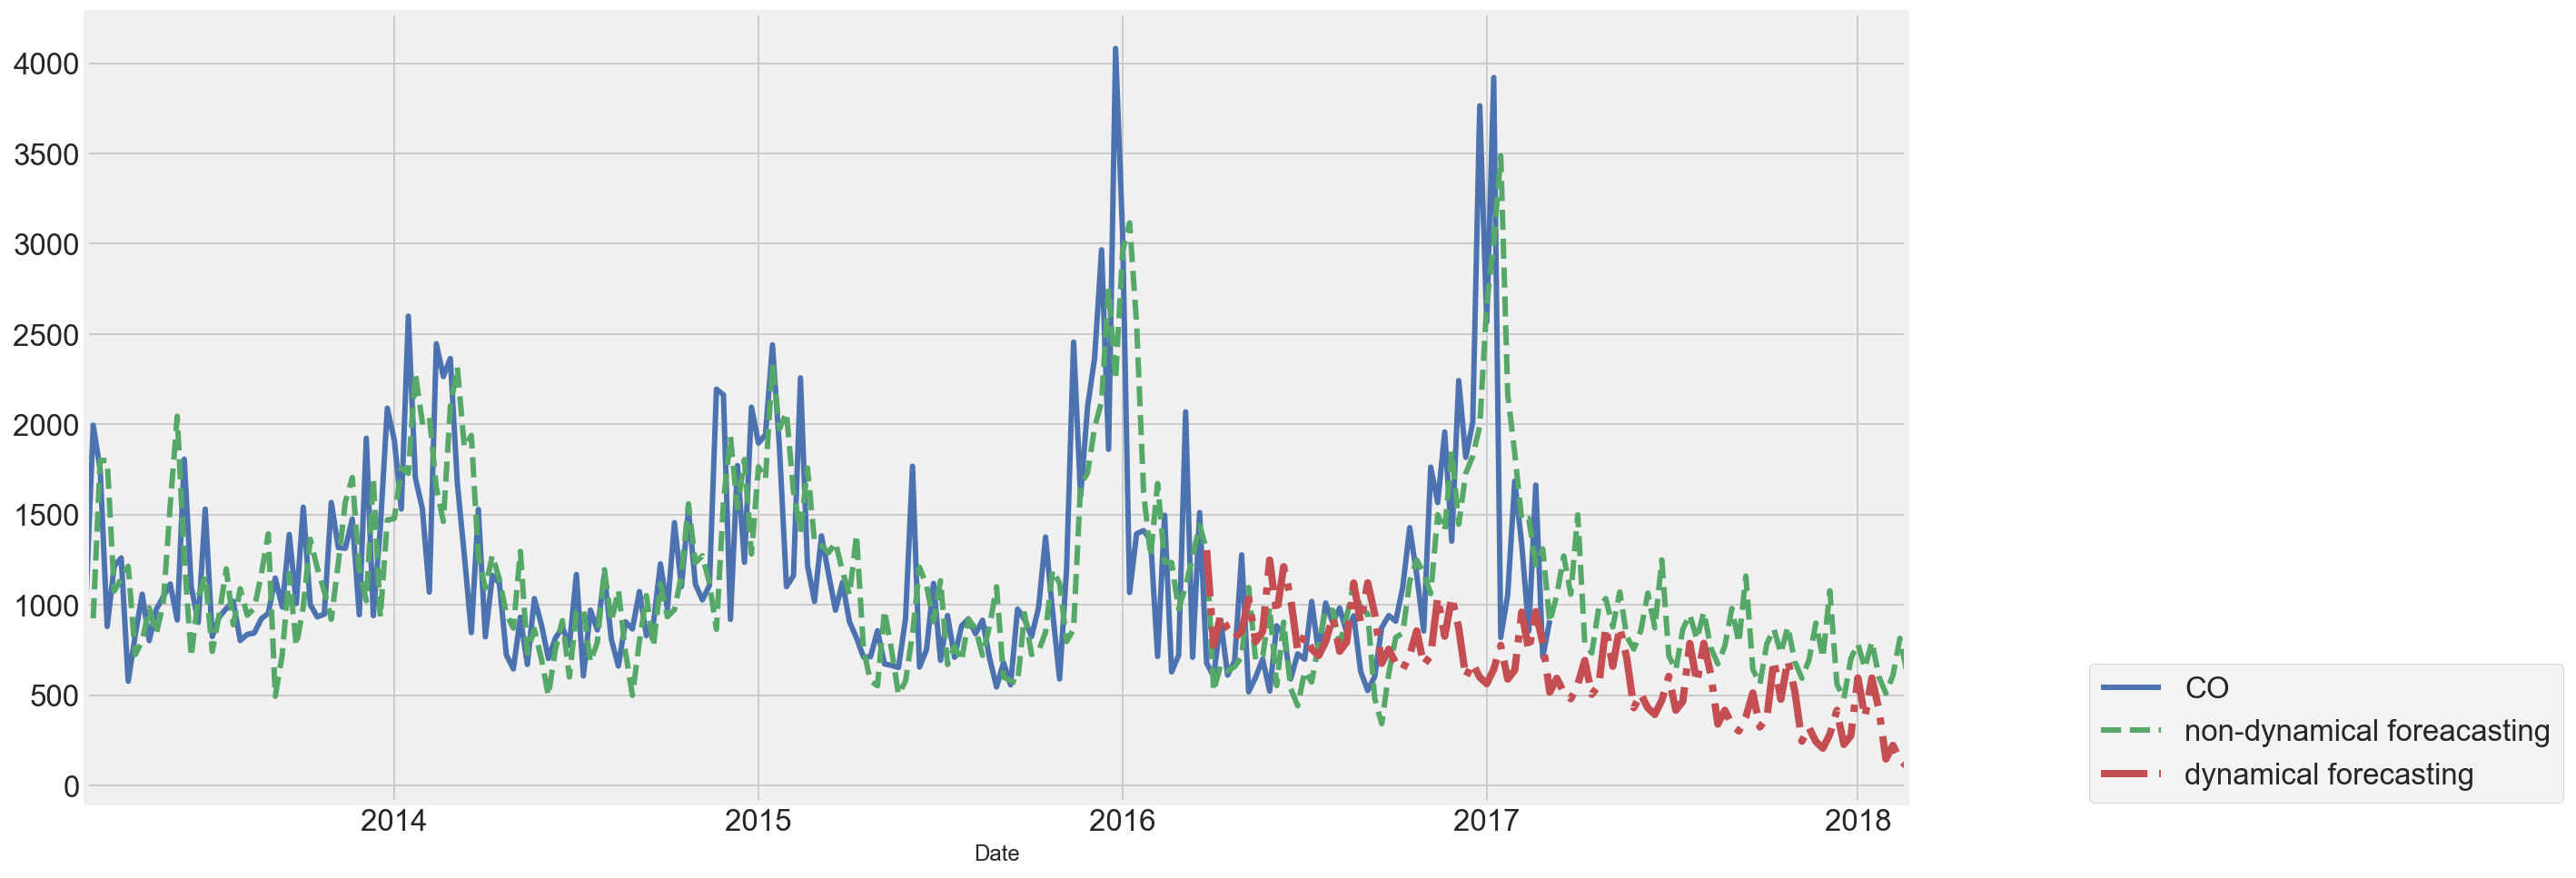

In [48]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

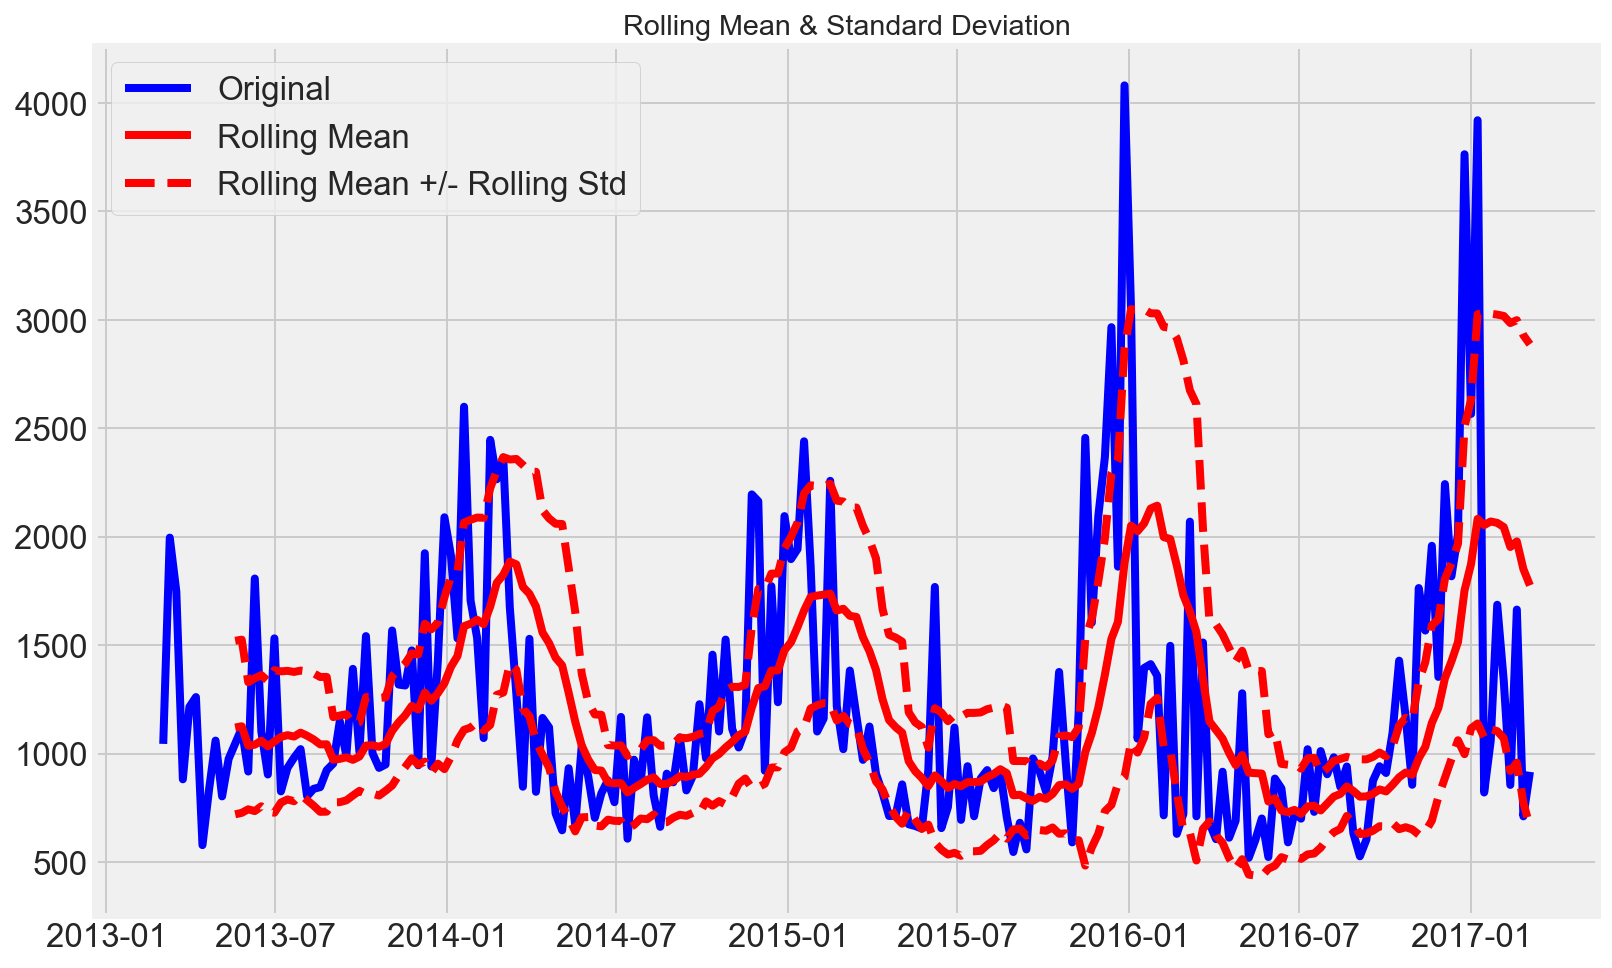

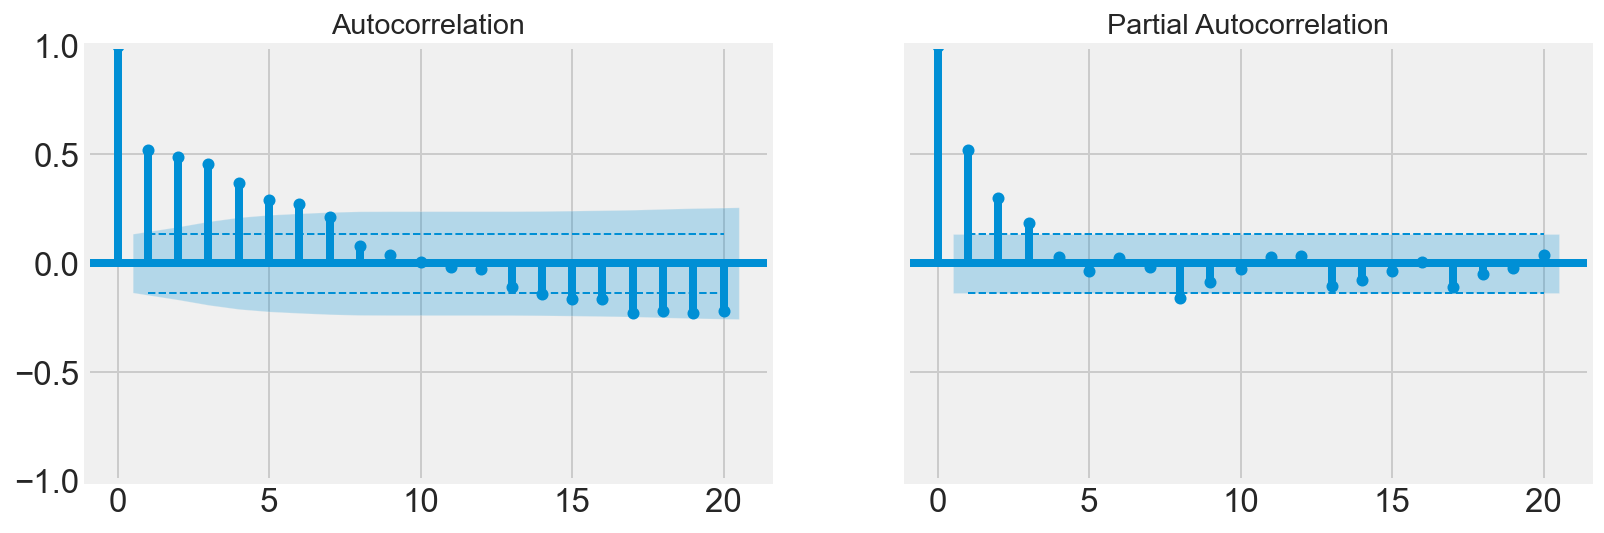

In [49]:
test_and_vis(CO_rate)

## O3 - Ozone

In [50]:
O3_rate = df_weekly[['O3']]
O3_rate

O3
Date                 
2013-03-03  41.135556
2013-03-10  71.200893
2013-03-17  72.194444
2013-03-24  48.581252
2013-03-31  40.110355
...               ...
2017-02-05  48.824107
2017-02-12  55.584571
2017-02-19  38.652903
2017-02-26  48.323748
2017-03-05  43.609520

[210 rows x 1 columns]

In [51]:
data = O3_rate

model6 = pmd.arima.ARIMA(order=(2, 1, 0), 
                        seasonal_order=(1, 1, 1, 12),
                        maxiter=500,
                        with_intercept=True)

model6.fit(data)

model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  210
Model:             SARIMAX(2, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -834.539
Date:                              Sat, 13 Nov 2021   AIC                           1681.078
Time:                                      20:27:55   BIC                           1700.777
Sample:                                           0   HQIC                          1689.053
                                              - 210                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0525      0.225     -0.234      0.815      -0.493       0.388
ar.L1         -0.4645      0.058     -8.052      0.000      -0.578      -0.351
ar.L2         -0.2433      0.070     -3.490      0.000      -0.380      -0.107
ar.S.L12       0.0501      0.100      0.503      0.615      -0.145       0.245
ma.S.L12      -0.9891      0.952     -1.039      0.299      -2.856       0.877
sigma2       238.6922    218.182      1.094      0.274    -188.936     666.320
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 2.15
Prob(Q):                              0.96   Prob(JB):                         0.34
Heteroskedasticity (H):               0.96   Skew:                             0.19
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

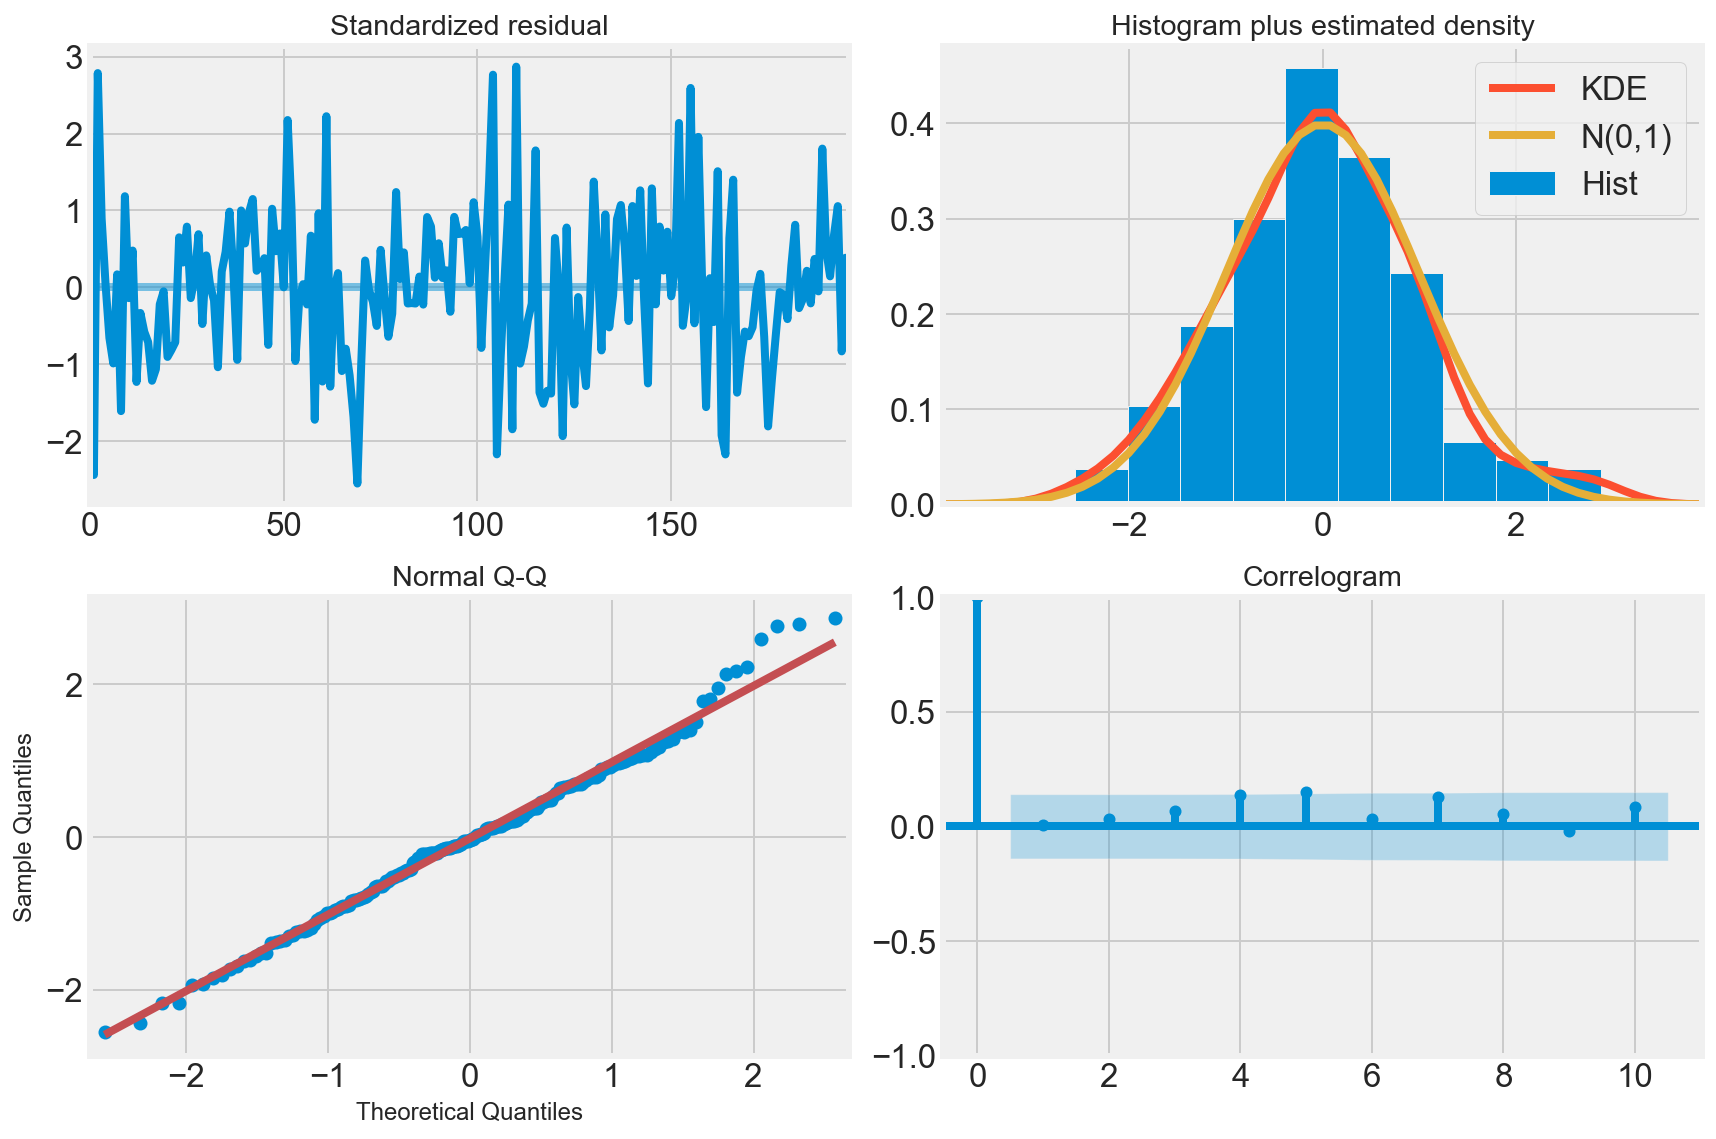

In [52]:
model6.plot_diagnostics(figsize=(12, 8))

plt.tight_layout()

plt.show()

In [53]:
# forecasting
start_p = 50

# start and end indicate position from where to start and where to end forecasting
# end can be beyond the end of the observed values
# predictions are returned as numpy arrays, to cast as pandas series need to create datetime index


preds, ci = model6.predict_in_sample(start=1, end=len(data)+50, return_conf_int=True, alpha=0.05)

preds_dyn = model6.predict_in_sample(start=len(data)-start_p, end=len(data)+50, dynamic=True)

index = pd.date_range(start=data.index[1], periods=len(data)+50, freq=data.index.freqstr)

index_dyn = pd.date_range(start=data.index[len(data)-start_p], periods=start_p+50+1, freq=data.index.freqstr)

preds = pd.Series(preds, index=index)
preds_dyn = pd.Series(preds_dyn, index=index_dyn)

ci = pd.DataFrame(ci, columns=['lower', 'upper'], index=index)
ci.head(13)

lower        upper
2013-03-10 -1919.409239  2001.607062
2013-03-17 -1889.346647  2031.669610
2013-03-24 -1888.346032  2032.670219
2013-03-31 -1911.952802  2009.063444
2013-04-07 -1920.428178  2000.588067
2013-04-14 -1907.975434  2013.040811
2013-04-21 -1895.494228  2025.522018
2013-04-28 -1895.607886  2025.408359
2013-05-05 -1901.818708  2019.197536
2013-05-12 -1868.426239  2052.590005
2013-05-19 -1881.093795  2039.922438
2013-05-26 -1281.485173  1491.515479
2013-06-02    67.753449   160.120626

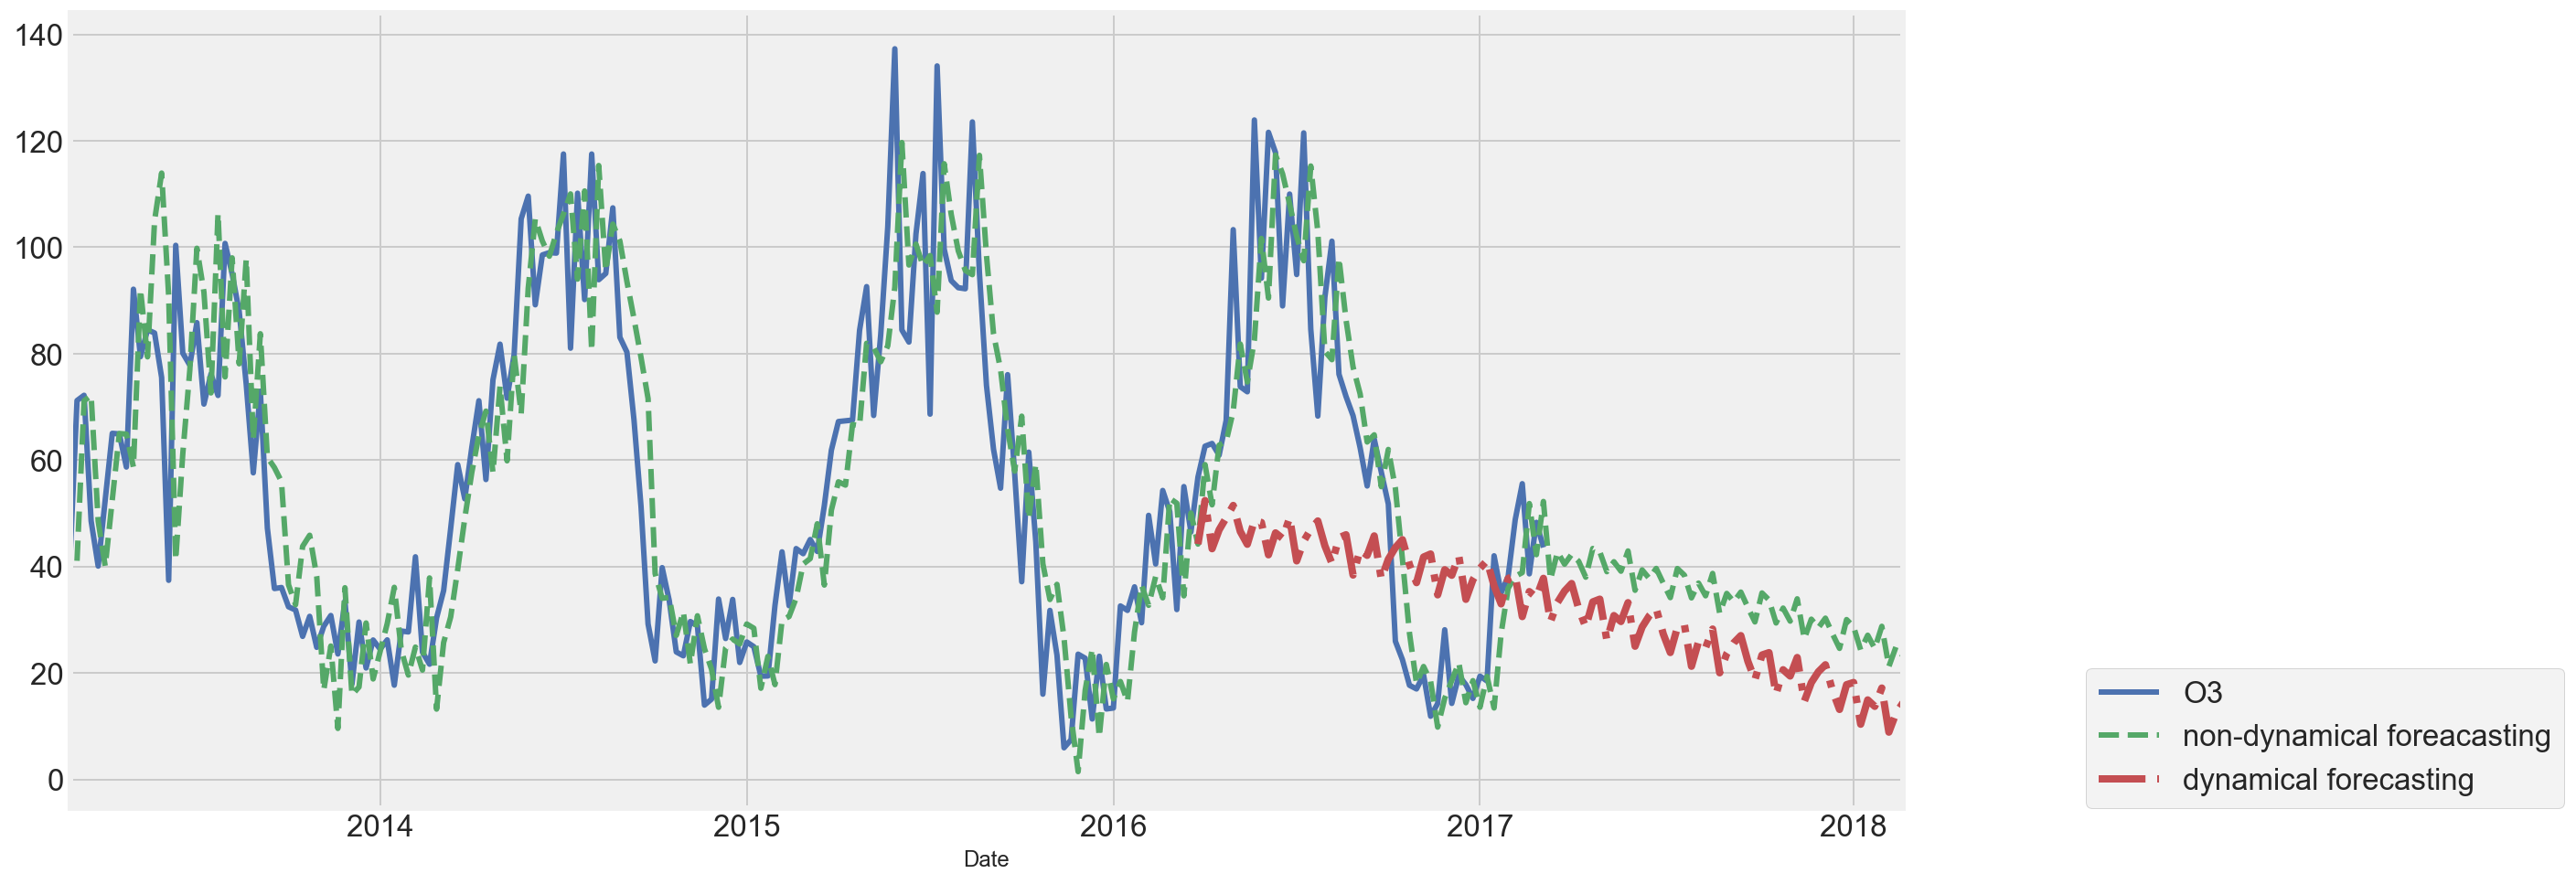

In [54]:
fig, ax = plt.subplots(figsize=(16, 8))

data.plot(c='b', label='data', lw=3, ax=ax)

preds.plot(c='g', ls='--', lw=3, label='non-dynamical foreacasting', ax=ax)
preds_dyn.plot(c='r', ls='-.', label='dynamical forecasting', ax=ax)

plt.legend(loc=[1.1, 0])

plt.show()

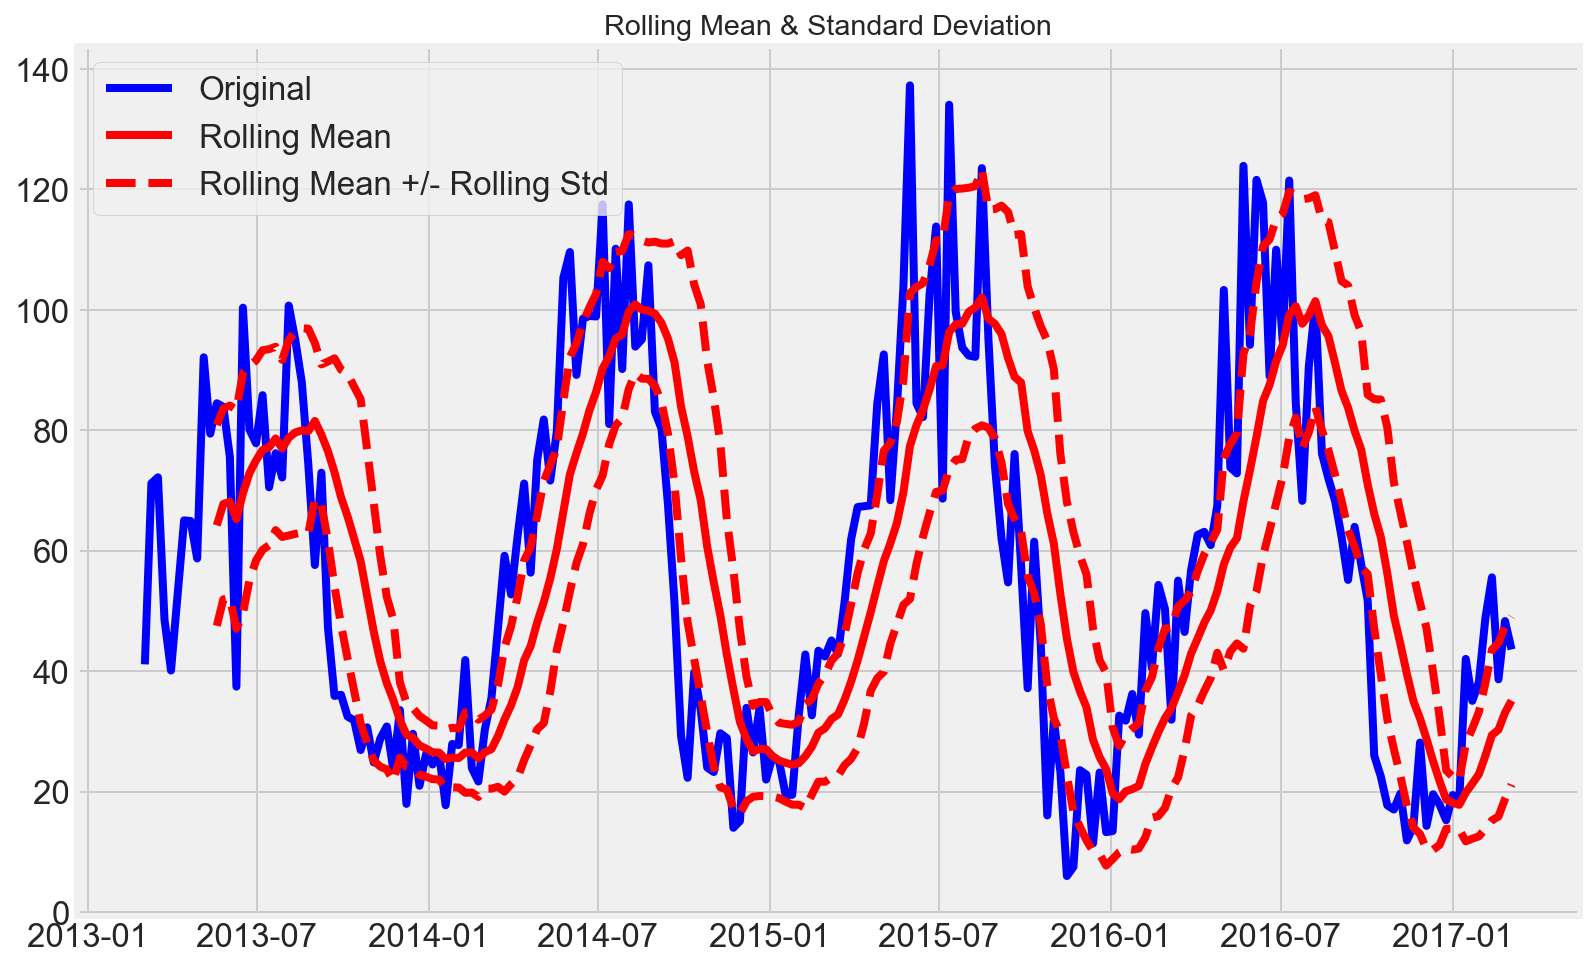

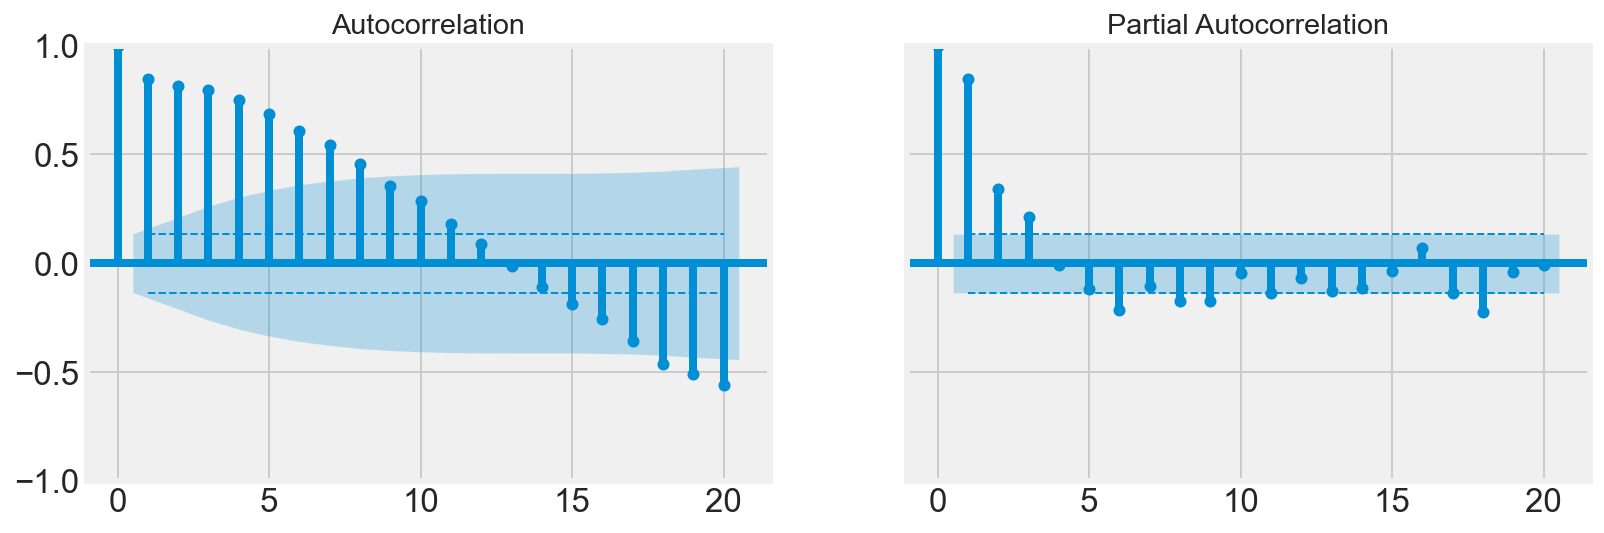

In [55]:
test_and_vis(O3_rate)